# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [2]:
!pip install -i https://test.pypi.org/simple/ amla_at1_24996427==2025.0.1.9

Looking in indexes: https://test.pypi.org/simple/
  Using cached https://test-files.pythonhosted.org/packages/42/2c/66c1845eba2048081b3251dde7071ed970a7bae92d58325e4a43dafbf582/amla_at1_24996427-2025.0.1.9-py3-none-any.whl (11 kB)
INFO: pip is looking at multiple versions of amla-at1-24996427 to determine which version is compatible with other requirements. This could take a while.


ERROR: Could not find a version that satisfies the requirement matplotlib==3.10.7 (from amla-at1-24996427) (from versions: none)
ERROR: No matching distribution found for matplotlib==3.10.7

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# <Student to fill this section>
import pandas as pd
import numpy as np

import re
from pathlib import Path
from datetime import datetime
from types import SimpleNamespace

In [1]:
# import common function package
from amla_at1_24996427.data.DataPrep import *
from amla_at1_24996427.features.FeatureSelection import *
from amla_at1_24996427.models.PerformanceMetrics import *

ModuleNotFoundError: No module named 'amla_at1_24996427.data.DataPrep'

In [ ]:
ROOT_DIR = Proot_dir = Path(__file__).resolve().parent.parent if '__file__' in globals() else Path.cwd().parent
DATA_DIR = ROOT_DIR / "data" / "raw" / "Ripple"
OUT_DIR = DATA_DIR / 'outputs'
PROCESSED_DIR = DATA_DIR / 'processed' 
MODEL_DIR = ROOT_DIR / 'models'

at = SimpleNamespace(folder_path=PROCESSED_DIR)

In [ ]:
Path(at.folder_path).mkdir(parents=True, exist_ok=True)
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
Path(MODEL_DIR).mkdir(parents=True, exist_ok=True)

---
## A. Project Description


In [ ]:
# <Student to fill this section>
student_name = "Ratticha Ratanawarocha"
student_id = "24996427"
group_id = "13"

In [ ]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [ ]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [ ]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [ ]:
# <Student to fill this section>
business_use_case_description = """
This project aims to help cryptocurrency investors make better short-term trading decisions by predicting the next-day high price of Ripple (XRP). 
Using historical market data, the model provides insights into price trends and volatility to support buy-sell timing and risk management. 
The experiment forms part of a broader group project where each member builds a model for a different 
token, later integrated into a Streamlit app with FastAPI deployment to deliver real-time, data-driven forecasts for end users.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [ ]:
# <Student to fill this section>
business_objectives = """
Accurate predictions can help investors identify profitable opportunities, reduce financial risk, and build confidence in data-driven trading decisions. 
In contrast, incorrect results may lead to poor investment choices, financial loss, and reduced trust in the predictive system.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [ ]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results will be used by cryptocurrency investors, analysts, and trading platform users to guide short-term investment decisions. 
The predictions will support users in identifying potential market movements and optimizing trading strategies. 
Accurate insights can benefit both individual traders and financial institutions by improving decision-making and reducing investment risks.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1 Load Datasets


In [ ]:
# <Student to fill this section>

In [ ]:

import os
import glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')

OUT_DIR.mkdir(parents=True, exist_ok=True)

# Find CSVs
files = sorted(glob.glob(str(DATA_DIR / 'XRP*.csv')) + glob.glob(str(DATA_DIR / 'xrp*.csv')))

if not files:
    print('No XRP CSV files found in /mnt/data. Please upload them first.')
else:
    dfs = [load_and_clean_csv(f) for f in files]   # using the common function
    xrp = pd.concat(dfs, ignore_index=True).drop_duplicates(subset=['date']).sort_values('date')
    print(f'Loaded {len(files)} files, total rows: {len(xrp):,}')

# %%
# ## 3. Data Cleaning Summary
print('Date range:', xrp['date'].min(), '→', xrp['date'].max())
print('Columns:', list(xrp.columns))

missing = xrp.isna().mean().sort_values(ascending=False) * 100
print('\nMissing values (%):')
print(missing)


Loaded 10 files, total rows: 3,653
Date range: 2015-01-01 23:59:59.999000+00:00 → 2024-12-31 23:59:59.999000+00:00
Columns: ['timeopen', 'time_close', 'time_high', 'time_low', 'open', 'high', 'low', 'close', 'volume', 'market_cap', 'timestamp', 'date', 'source_file']

Missing values (%):
timeopen       0.0
time_close     0.0
time_high      0.0
time_low       0.0
open           0.0
high           0.0
low            0.0
close          0.0
volume         0.0
market_cap     0.0
timestamp      0.0
date           0.0
source_file    0.0
dtype: float64


In [ ]:
xrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   timeopen     3653 non-null   object             
 1   time_close   3653 non-null   object             
 2   time_high    3653 non-null   object             
 3   time_low     3653 non-null   object             
 4   open         3653 non-null   float64            
 5   high         3653 non-null   float64            
 6   low          3653 non-null   float64            
 7   close        3653 non-null   float64            
 8   volume       3653 non-null   float64            
 9   market_cap   3653 non-null   float64            
 10  timestamp    3653 non-null   object             
 11  date         3653 non-null   datetime64[ns, UTC]
 12  source_file  3653 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(6), object(6)
memory usage: 371.1+ KB


In [ ]:
display(xrp.head(5))

,timeopen,time_close,time_high,time_low,open,high,low,close,volume,market_cap,timestamp,date,source_file
0,2015-01-01T00:00:00.000Z,2015-01-01T23:59:59.999Z,2015-01-01T00:04:04.000Z,2015-01-01T05:24:04.000Z,0.024455,0.024455,0.024205,0.024390,399022.0,7.555584e+08,2015-01-01T23:59:59.999Z,2015-01-01 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...
1,2015-01-02T00:00:00.000Z,2015-01-02T23:59:59.999Z,2015-01-02T03:09:04.000Z,2015-01-02T23:09:05.000Z,0.024377,0.024423,0.024309,0.024318,459956.0,7.533403e+08,2015-01-02T23:59:59.999Z,2015-01-02 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...
2,2015-01-03T00:00:00.000Z,2015-01-03T23:59:59.999Z,2015-01-03T00:29:04.000Z,2015-01-03T23:59:04.000Z,0.024297,0.024317,0.022106,0.022106,2171040.0,6.847982e+08,2015-01-03T23:59:59.999Z,2015-01-03 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...
3,2015-01-04T00:00:00.000Z,2015-01-04T23:59:59.999Z,2015-01-04T00:49:04.000Z,2015-01-04T23:04:04.000Z,0.022100,0.022142,0.018828,0.018928,3801010.0,5.863499e+08,2015-01-04T23:59:59.999Z,2015-01-04 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...
4,2015-01-05T00:00:00.000Z,2015-01-05T23:59:59.999Z,2015-01-05T23:59:04.000Z,2015-01-05T00:09:04.000Z,0.018943,0.020316,0.018890,0.020316,3051930.0,6.293506e+08,2015-01-05T23:59:59.999Z,2015-01-05 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...


In [ ]:
numeric_cols = [c for c in ['open','high','low','close','volume','market_cap'] if c in xrp.columns]
summary = xrp[numeric_cols].describe().T
summary['missing_%'] = 100 * xrp[numeric_cols].isna().mean()
summary

,count,mean,std,min,25%,50%,75%,max,missing_%
open,3653.0,4.079195e-01,3.921454e-01,4.090780e-03,1.775820e-01,3.418074e-01,5.480213e-01,3.363570e+00,0.0
high,3653.0,4.243492e-01,4.170230e-01,4.189240e-03,1.825990e-01,3.530790e-01,5.672934e-01,3.841940e+00,0.0
low,3653.0,3.909608e-01,3.680295e-01,4.041380e-03,1.715492e-01,3.303050e-01,5.297881e-01,3.117340e+00,0.0
close,3653.0,4.084958e-01,3.931195e-01,4.090070e-03,1.778820e-01,3.420822e-01,5.480446e-01,3.377810e+00,0.0
volume,3653.0,1.788268e+09,3.360717e+09,2.481880e+04,8.840800e+07,9.766888e+08,1.889112e+09,5.172338e+10,0.0
market_cap,3653.0,1.925848e+10,1.935655e+10,1.371705e+08,7.083526e+09,1.525609e+10,2.824906e+10,1.548332e+11,0.0


In [ ]:
from scipy.stats import skew, kurtosis

stats_df = pd.DataFrame({
    'mean': [xrp['high'].mean(), xrp['low'].mean(), xrp['open'].mean(), xrp['close'].mean(), xrp['volume'].mean()],
    'std': [xrp['high'].std(), xrp['low'].std(), xrp['open'].std(), xrp['close'].std(), xrp['volume'].std()],
    'skew': [skew(xrp['high'].dropna()), skew(xrp['low'].dropna()), skew(xrp['open'].dropna()), skew(xrp['close'].dropna()), skew(xrp['volume'].dropna())],
    'kurtosis': [kurtosis(xrp['high'].dropna()), kurtosis(xrp['low'].dropna()), kurtosis(xrp['open'].dropna()), kurtosis(xrp['close'].dropna()), kurtosis(xrp['volume'].dropna())]
    }, index=['high','low','open','close','volume'])


stats_df

,mean,std,skew,kurtosis
high,4.243492e-01,4.170230e-01,2.393210,9.995073
low,3.909608e-01,3.680295e-01,2.110998,8.089352
open,4.079195e-01,3.921454e-01,2.229928,8.760607
close,4.084958e-01,3.931195e-01,2.229437,8.688202
volume,1.788268e+09,3.360717e+09,5.341413,42.155769


### C.2 Define Target variable

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
target_definition_explanations = """
The target variable is defined as the next-day high price of Ripple (XRP), which aligns with the business goal of helping investors anticipate short-term market movements. 
Predicting the high price for the following day allows users to estimate potential profit margins and make timely trading decisions. 
This approach reflects realistic investor behavior in fast-moving crypto markets, where understanding tomorrow’s price peak can guide better buy or sell strategies.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [ ]:
# <Student to fill this section>

raw_target_name = 'raw_high_next_day'
target_name = 'high_next_day'

In [ ]:
y_curr_high_price = pd.DataFrame(columns=['high','year'])

In [ ]:
xrp[raw_target_name] = xrp["high"].shift(-2) 
xrp[target_name] = np.log(xrp["high"].shift(-2)) - np.log(xrp["high"])
xrp['date_target'] = xrp['date'].shift(-2)
y_curr_high_price['high'] = xrp['high'].copy()
y_curr_high_price['year'] = xrp['date_target'].dt.year

In [ ]:
y_curr_high_price = y_curr_high_price.dropna().reset_index(drop=True)
y_curr_high_price

,high,year
0,0.024455,2015.0
1,0.024423,2015.0
2,0.024317,2015.0
3,0.022142,2015.0
4,0.020316,2015.0
...,...,...
3646,2.327811,2024.0
3647,2.311979,2024.0
3648,2.231316,2024.0
3649,2.199492,2024.0


In [ ]:
xrp = xrp.dropna().reset_index(drop=True)

In [ ]:
display(xrp.head(5))

,timeopen,time_close,time_high,time_low,open,high,low,close,volume,market_cap,timestamp,date,source_file,raw_high_next_day,high_next_day,date_target
0,2015-01-01T00:00:00.000Z,2015-01-01T23:59:59.999Z,2015-01-01T00:04:04.000Z,2015-01-01T05:24:04.000Z,0.024455,0.024455,0.024205,0.024390,399022.0,7.555584e+08,2015-01-01T23:59:59.999Z,2015-01-01 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...,0.024317,-0.005663,2015-01-03 23:59:59.999000+00:00
1,2015-01-02T00:00:00.000Z,2015-01-02T23:59:59.999Z,2015-01-02T03:09:04.000Z,2015-01-02T23:09:05.000Z,0.024377,0.024423,0.024309,0.024318,459956.0,7.533403e+08,2015-01-02T23:59:59.999Z,2015-01-02 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...,0.022142,-0.098040,2015-01-04 23:59:59.999000+00:00
2,2015-01-03T00:00:00.000Z,2015-01-03T23:59:59.999Z,2015-01-03T00:29:04.000Z,2015-01-03T23:59:04.000Z,0.024297,0.024317,0.022106,0.022106,2171040.0,6.847982e+08,2015-01-03T23:59:59.999Z,2015-01-03 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...,0.020316,-0.179759,2015-01-05 23:59:59.999000+00:00
3,2015-01-04T00:00:00.000Z,2015-01-04T23:59:59.999Z,2015-01-04T00:49:04.000Z,2015-01-04T23:04:04.000Z,0.022100,0.022142,0.018828,0.018928,3801010.0,5.863499e+08,2015-01-04T23:59:59.999Z,2015-01-04 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...,0.020745,-0.065175,2015-01-06 23:59:59.999000+00:00
4,2015-01-05T00:00:00.000Z,2015-01-05T23:59:59.999Z,2015-01-05T23:59:04.000Z,2015-01-05T00:09:04.000Z,0.018943,0.020316,0.018890,0.020316,3051930.0,6.293506e+08,2015-01-05T23:59:59.999Z,2015-01-05 23:59:59.999000+00:00,XRP_01_01_2015-01_01_2016_historical_data_coin...,0.020899,0.028312,2015-01-07 23:59:59.999000+00:00


### C.4 Explore Target variable

In [ ]:
# <Student to fill this section>


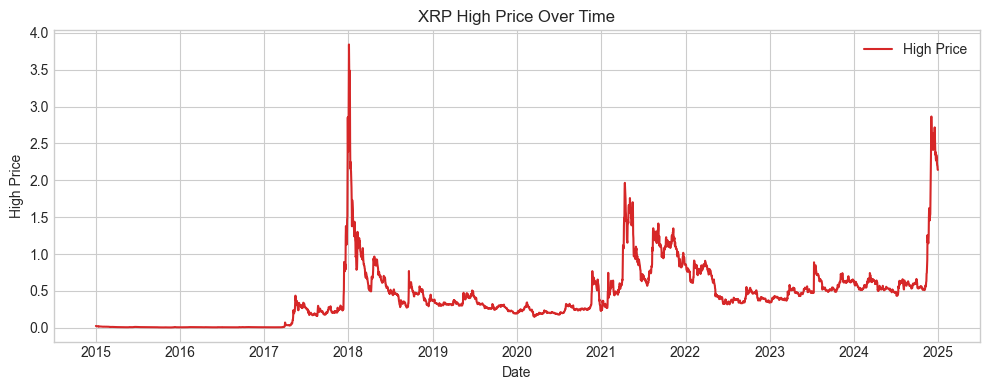

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp[raw_target_name], label='High Price', color='tab:red')
plt.title('XRP High Price Over Time')   
plt.xlabel('Date'); plt.ylabel('High Price'); plt.legend()
plt.tight_layout(); plt.show()


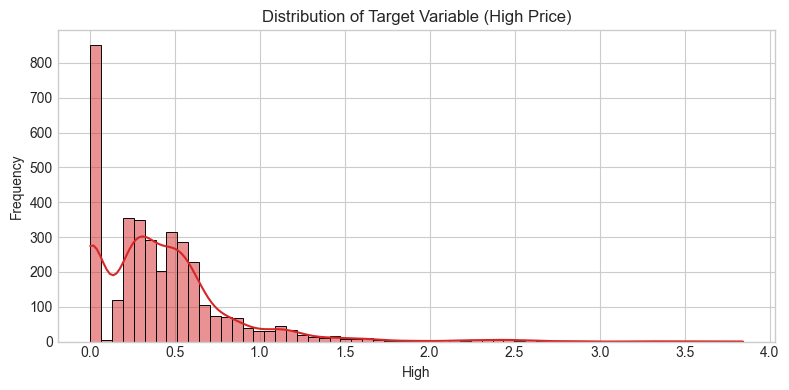

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(xrp[raw_target_name].dropna(), bins=60, kde=True, color='tab:red')
plt.title('Distribution of Target Variable (High Price)')
plt.xlabel('High'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

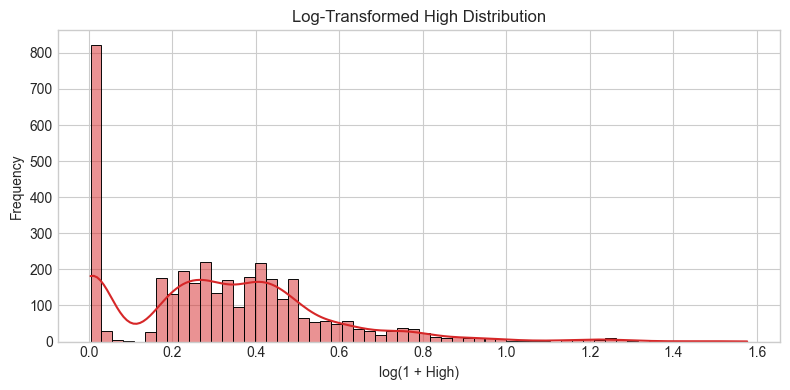

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(np.log1p(xrp[raw_target_name]).dropna(), bins=60, kde=True, color='tab:red')
plt.title('Log-Transformed High Distribution')
plt.xlabel('log(1 + High)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

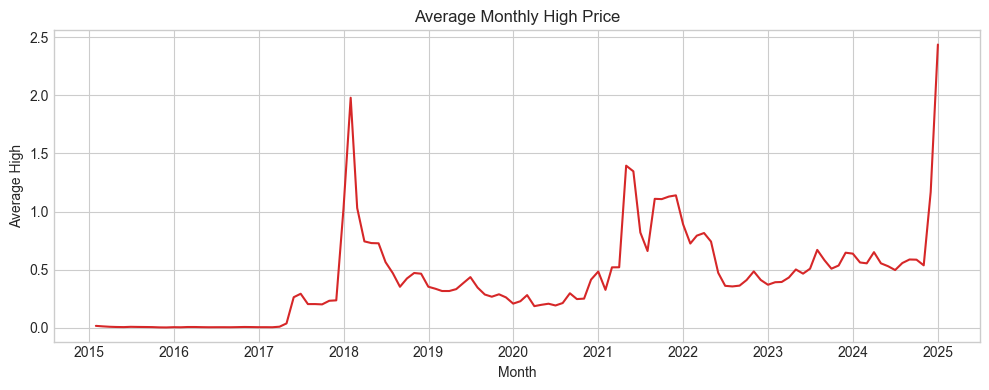

In [ ]:
monthly = xrp.set_index('date')[raw_target_name].resample('M').mean()
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly.values,  color='tab:red')
plt.title('Average Monthly High Price')
plt.xlabel('Month'); plt.ylabel('Average High')
plt.tight_layout(); plt.show()

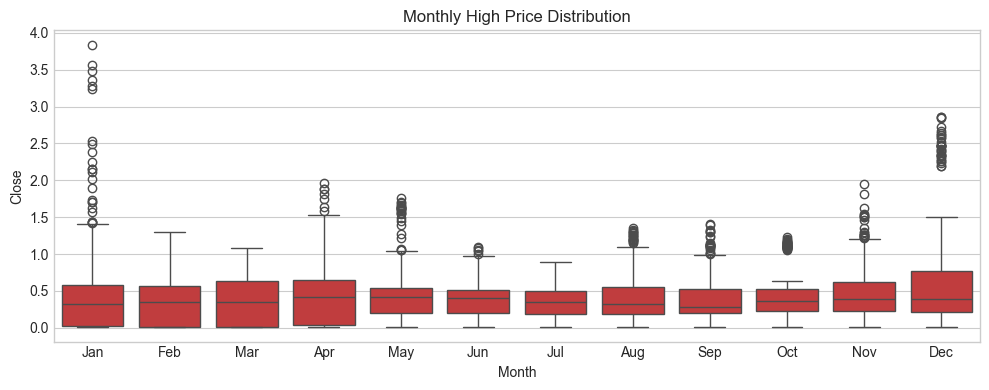

In [ ]:
xrp['month_name'] = xrp['date'].dt.strftime('%b')
plt.figure(figsize=(10,4))
sns.boxplot(x='month_name', y='high', data=xrp, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], color='tab:red')
plt.title('Monthly High Price Distribution')
plt.xlabel('Month'); plt.ylabel('Close')
plt.tight_layout(); plt.show()

In [ ]:
numeric_cols = ['open', 'high_next_day', 'low', 'close', 'volume', 'market_cap']
corr = xrp[numeric_cols].corr()

In [ ]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable represents the high price two days ahead (t+2) for Ripple (XRP). 
This setup reflects a realistic trading scenario where investors can only access yesterday’s data, as today’s information may not yet be available due to market closing times. 
By predicting the high price two days into the future, the model provides users with an early forecast window to plan their buy or sell strategies more effectively.
The time series plot shows strong volatility between 2015 and 2024, with major spikes during 2018 and 2021 reflecting global crypto bull runs. 
The distribution of the target variable is highly right-skewed with long tails, meaning that high prices are rare but extreme when they occur. 
After applying a log transformation, the distribution becomes smoother and closer to normal, improving stability for model training. 
The monthly average trend highlights seasonal fluctuations, with December showing the highest volatility. 
The monthly boxplot also confirms that late-year months contain more outliers, suggesting heightened market activity during those periods.
Overall, while the t+2 approach enhances real-world usability, the high volatility and skewness of the target variable remain challenges that must be managed carefully during model training and evaluation.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest "\<open\>"

In [ ]:
# <Student to fill this section>

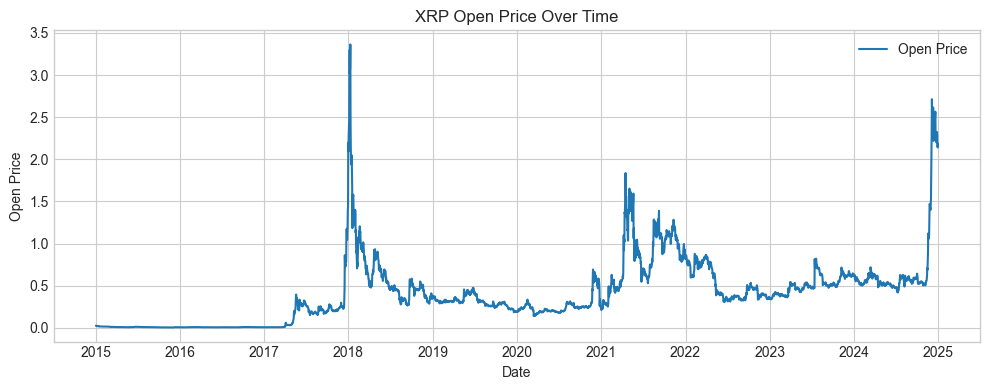

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['open'], label='Open Price', color='tab:blue')
plt.title('XRP Open Price Over Time')
plt.xlabel('Date'); plt.ylabel('Open Price'); plt.legend()
plt.tight_layout(); plt.show()

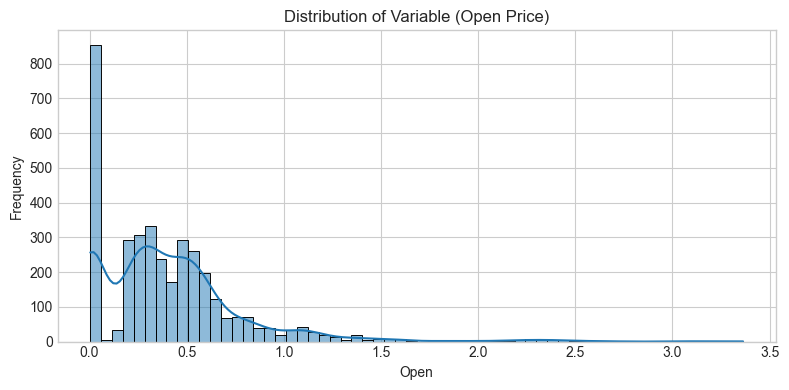

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(xrp['open'].dropna(), bins=60, kde=True, color='tab:blue')
plt.title('Distribution of Variable (Open Price)')
plt.xlabel('Open'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

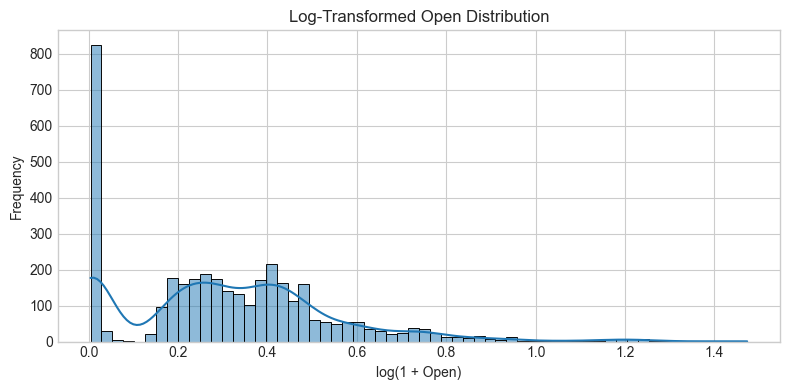

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(np.log1p(xrp['open']).dropna(), bins=60, kde=True, color='tab:blue')
plt.title('Log-Transformed Open Distribution')
plt.xlabel('log(1 + Open)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

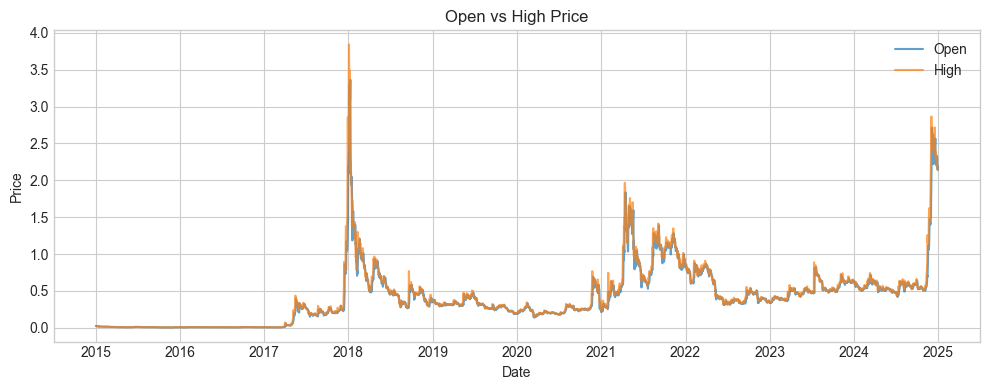

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['open'], label='Open', alpha=0.7)
plt.plot(xrp['date'], xrp[raw_target_name], label='High', alpha=0.7)
plt.title('Open vs High Price')
plt.xlabel('Date'); plt.ylabel('Price'); plt.legend()
plt.tight_layout(); plt.show()

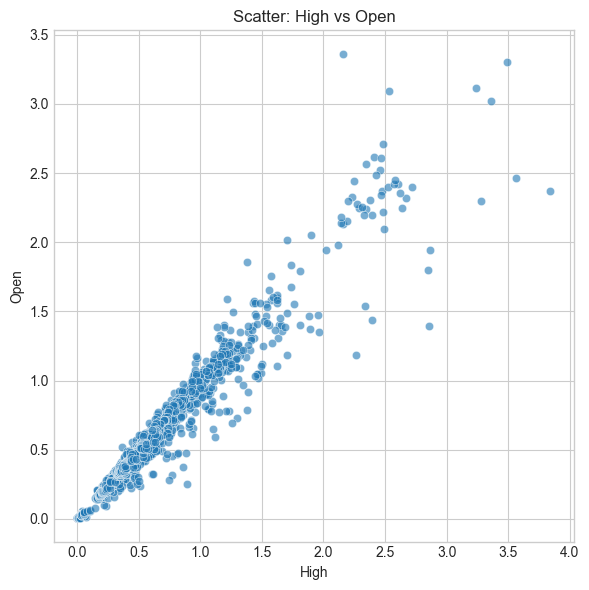

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=xrp[raw_target_name], y=xrp['open'], alpha=0.6)
plt.title('Scatter: High vs Open')
plt.xlabel('High'); plt.ylabel('Open')
plt.tight_layout(); plt.show()

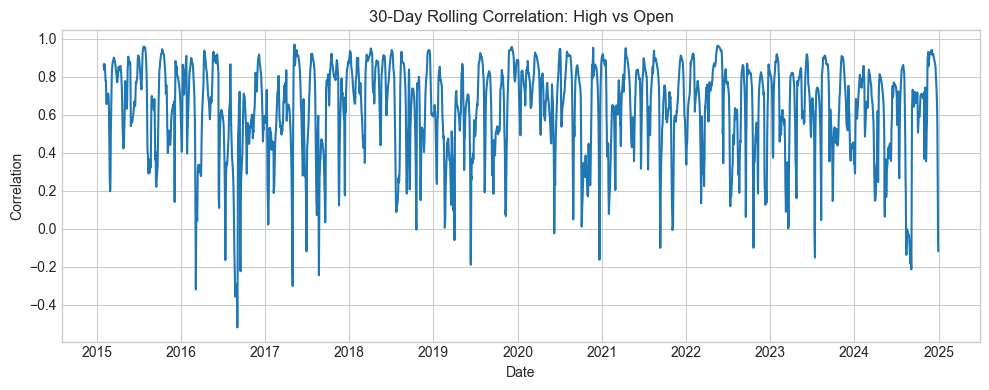

In [ ]:
roll_corr = xrp[raw_target_name].rolling(30).corr(xrp['open'])
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], roll_corr, color='tab:blue')
plt.title('30-Day Rolling Correlation: High vs Open')
plt.xlabel('Date'); plt.ylabel('Correlation')
plt.tight_layout(); plt.show()

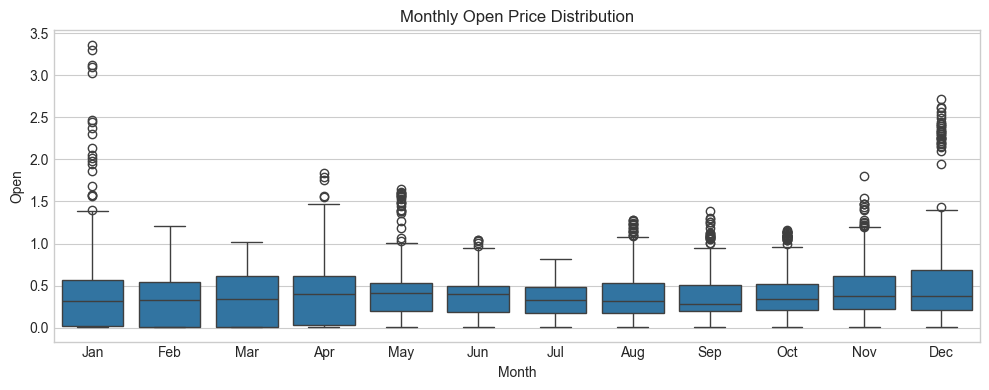

In [ ]:
xrp['month_name'] = xrp['date'].dt.strftime('%b')
plt.figure(figsize=(10,4))
sns.boxplot(x='month_name', y='open', data=xrp, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Open Price Distribution')
plt.xlabel('Month'); plt.ylabel('Open')
plt.tight_layout(); plt.show()

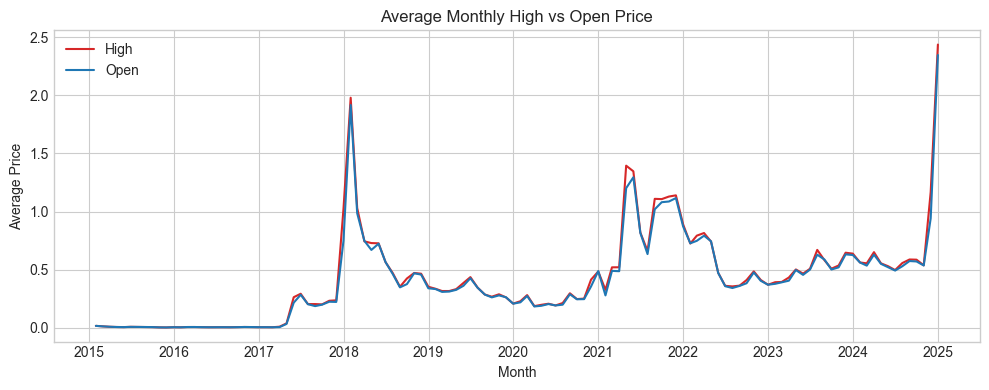

In [ ]:
monthly = xrp.set_index('date')[[raw_target_name,'open']].resample('M').mean()
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly[raw_target_name], label='High', color='tab:red')
plt.plot(monthly.index, monthly['open'], label='Open', color='tab:blue')
plt.title('Average Monthly High vs Open Price')
plt.xlabel('Month'); plt.ylabel('Average Price'); plt.legend()
plt.tight_layout(); plt.show()

In [ ]:
sub_corr = corr[['open']].T
print('Correlations with Open:')
print(sub_corr)

Correlations with Open:
      open  high_next_day       low     close    volume  market_cap
open   1.0      -0.058159  0.994638  0.993326  0.547592    0.974865


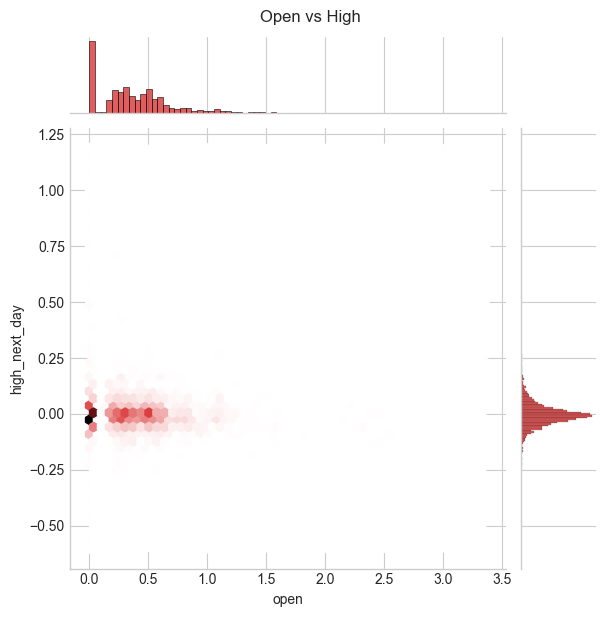

In [ ]:

sns.jointplot(x='open', y='high_next_day', data=xrp, kind='hex', color='tab:red')
plt.suptitle('Open vs High', y=1.02)
plt.show()

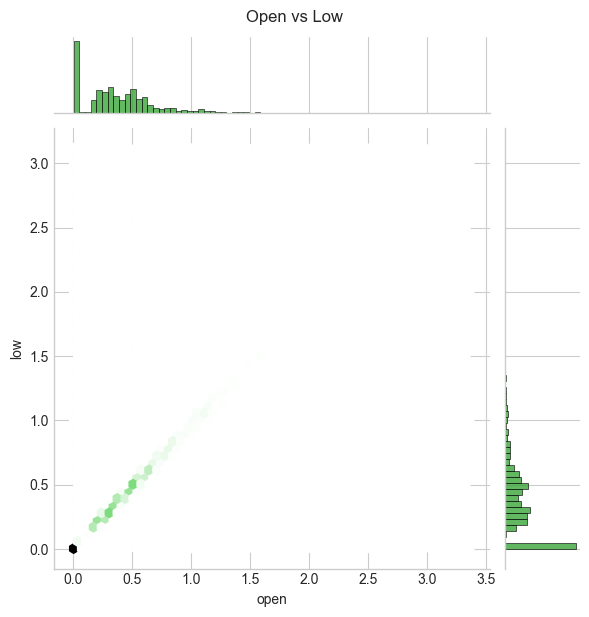

In [ ]:
sns.jointplot(x='open', y='low', data=xrp, kind='hex', color='tab:green')
plt.suptitle('Open vs Low', y=1.02)
plt.show()

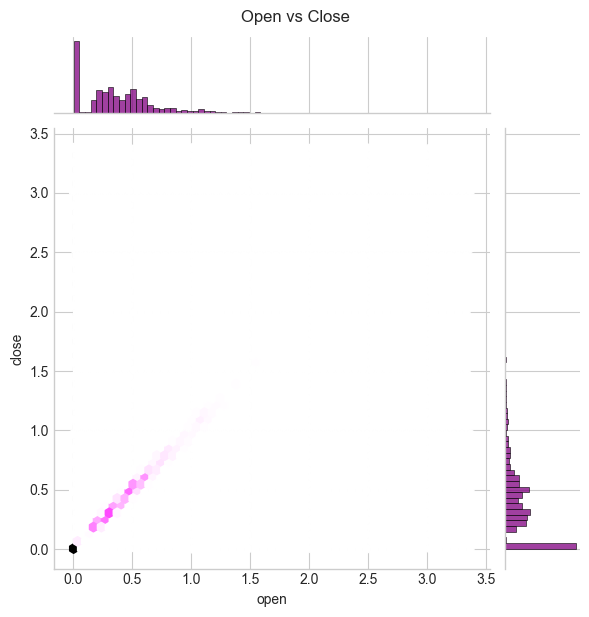

In [ ]:

sns.jointplot(x='open', y='close', data=xrp, kind='hex', color='purple')
plt.suptitle('Open vs Close', y=1.02)
plt.show()

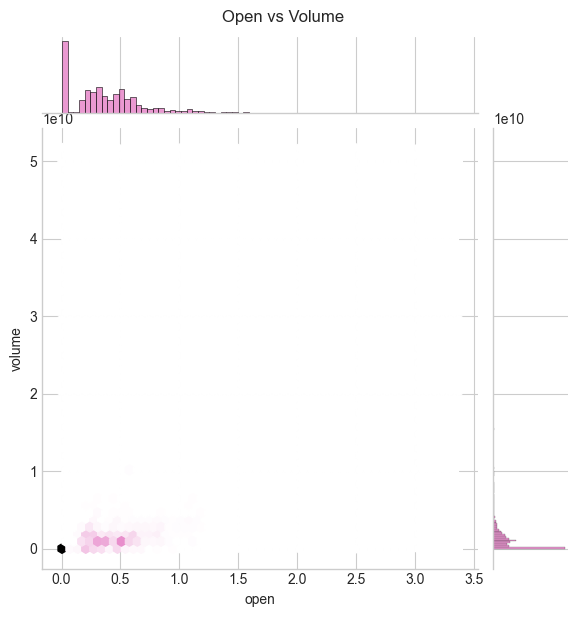

In [ ]:
sns.jointplot(x='open', y='volume', data=xrp, kind='hex', color='tab:pink')
plt.suptitle('Open vs Volume', y=1.02)
plt.show()

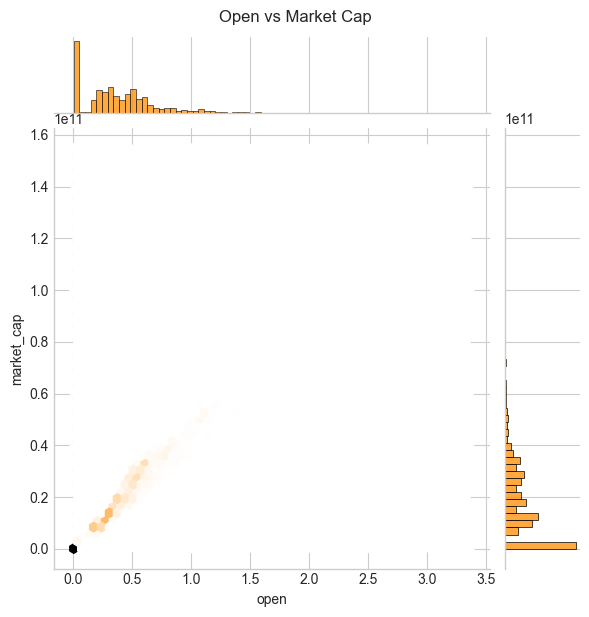

In [ ]:

sns.jointplot(x='open', y='market_cap', data=xrp, kind='hex', color='darkorange')
plt.suptitle('Open vs Market Cap', y=1.02)
plt.show()

In [ ]:
# <Student to fill this section>
feature_1_insights = """
The time-series plot of Open shows periods of stability followed by sharp increases, especially during 2018, 2021, and late 2024, reflecting the typical boom-and-bust cycles of XRP.
The histogram of Open prices is right-skewed with a long tail, indicating many low-value days and occasional large spikes in price.
The log(1+Open) transformation produces a smoother and more symmetric distribution, making the variable better suited for regression modeling.
The comparison of Open and High prices over time shows similar movement patterns, where both rise and fall together, confirming strong intraday co-movement.
The scatter plot between High and Open displays a near-linear relationship, showing that higher Open prices tend to correspond with higher High prices on the same day.
The 30-day rolling correlation between Open and High is generally strong (above 0.8) but fluctuates, highlighting that this relationship can weaken during volatile market periods.
The monthly boxplot of Open shows more frequent outliers toward the end of the year, especially in November and December, when trading activity intensifies.
The average monthly trend of Open vs High indicates that both move closely together across time, demonstrating that Open can reflect overall market conditions.
The jointplot of Open vs High_next_day (t+2) shows a weak positive relationship, suggesting that today’s Open alone has limited predictive power for forecasting two days ahead.
The Open vs Low plot confirms a very high correlation, as both represent similar market ranges within the same day.
The Open vs Close jointplot displays a near-perfect linear relationship, indicating that daily opening and closing prices are tightly connected.
The Open vs Volume relationship is weak, implying that trading volume does not increase proportionally with the opening price, but instead responds to market sentiment or external news.
The Open vs Market Cap plot shows a strong positive relationship, as higher prices directly contribute to higher total market capitalization, reinforcing the consistency of the dataset.
Overall, Open is highly correlated with other price-based features (High, Low, Close, Market Cap) but only weakly linked to the t+2 target, indicating it serves better as a contextual or supporting feature rather than a direct predictor for future highs.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest "\<close\>"

In [ ]:
# <Student to fill this section>

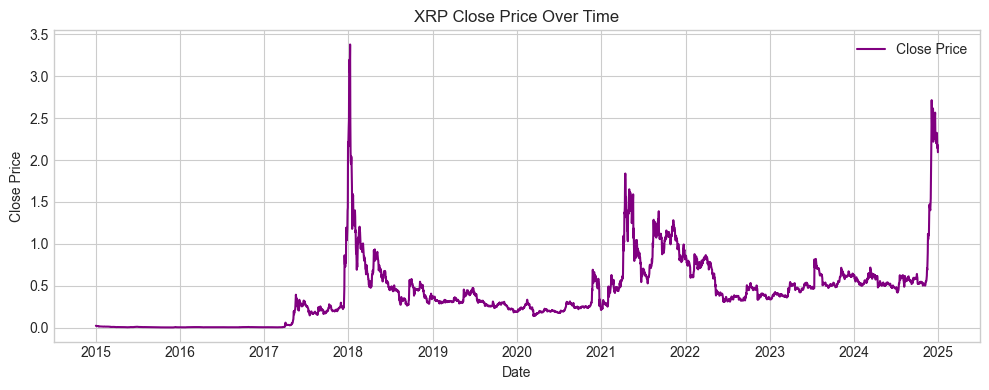

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['close'], label='Close Price', color='purple')
plt.title('XRP Close Price Over Time')
plt.xlabel('Date'); plt.ylabel('Close Price'); plt.legend()
plt.tight_layout(); plt.show()

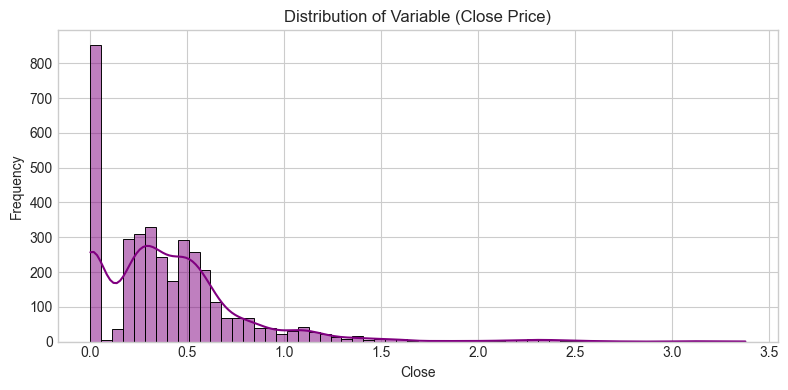

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(xrp['close'].dropna(), bins=60, kde=True, color='purple')
plt.title('Distribution of Variable (Close Price)')
plt.xlabel('Close'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

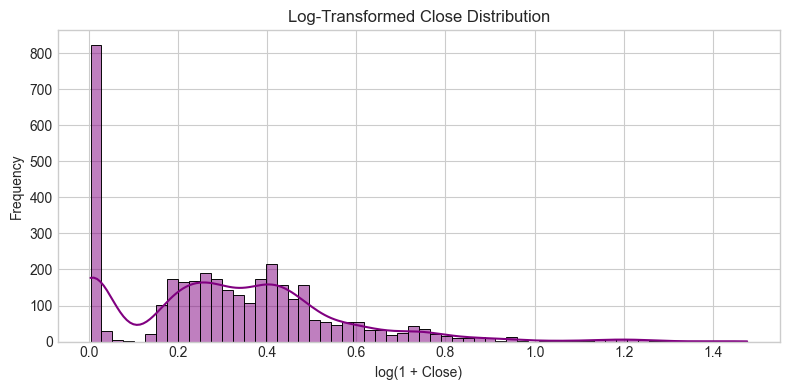

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(np.log1p(xrp['close']).dropna(), bins=60, kde=True, color='purple')
plt.title('Log-Transformed Close Distribution')
plt.xlabel('log(1 + Close)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

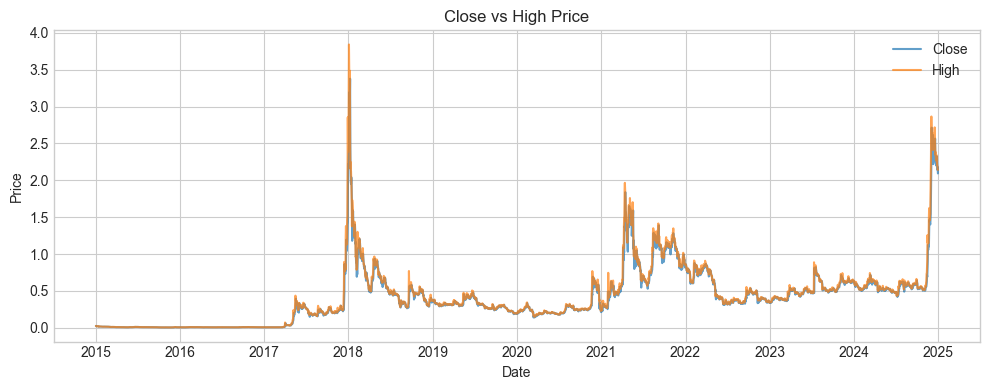

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['close'], label='Close', alpha=0.7)
plt.plot(xrp['date'], xrp[raw_target_name], label='High', alpha=0.7)
plt.title('Close vs High Price')
plt.xlabel('Date'); plt.ylabel('Price'); plt.legend()
plt.tight_layout(); plt.show()

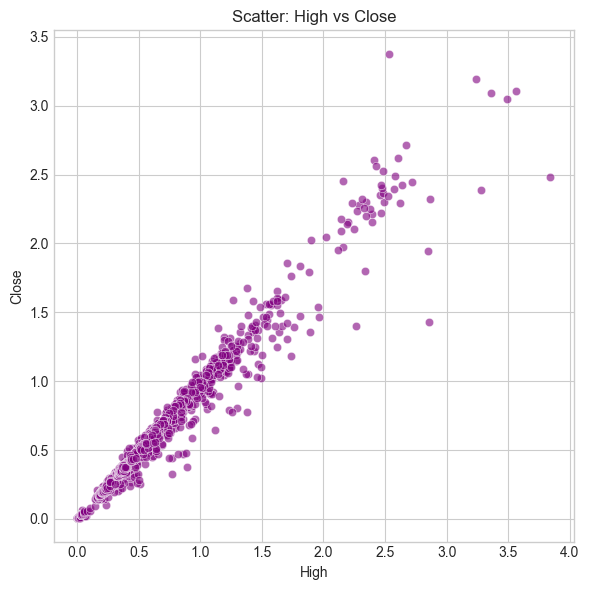

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=xrp[raw_target_name], y=xrp['close'], alpha=0.6, color='purple')
plt.title('Scatter: High vs Close')
plt.xlabel('High'); plt.ylabel('Close')
plt.tight_layout(); plt.show()

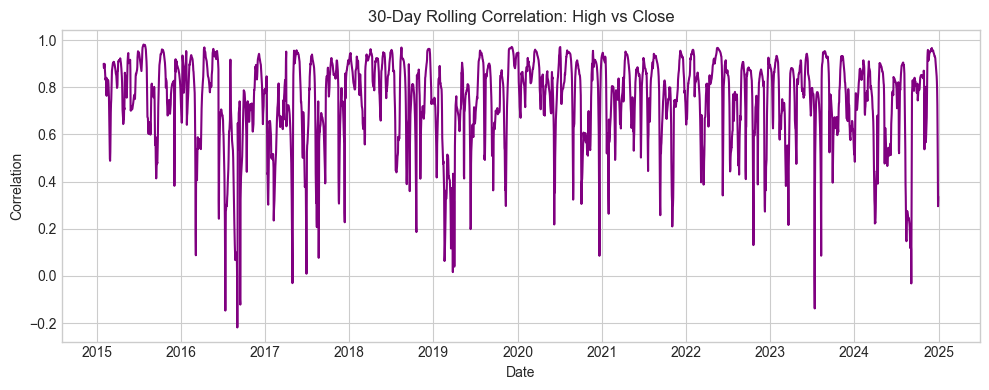

In [ ]:
roll_corr = xrp[raw_target_name].rolling(30).corr(xrp['close'])
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], roll_corr, color='purple')
plt.title('30-Day Rolling Correlation: High vs Close')
plt.xlabel('Date'); plt.ylabel('Correlation')
plt.tight_layout(); plt.show()

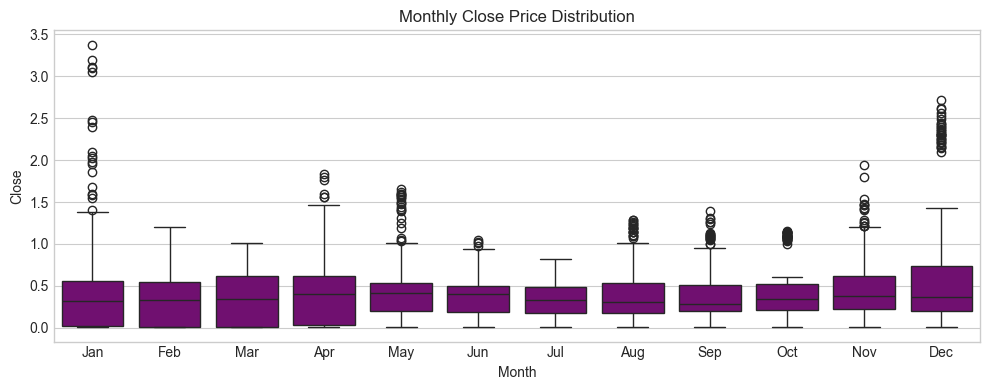

In [ ]:
xrp['month_name'] = xrp['date'].dt.strftime('%b')
plt.figure(figsize=(10,4))
sns.boxplot(x='month_name', y='close', data=xrp, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], color='purple')
plt.title('Monthly Close Price Distribution')
plt.xlabel('Month'); plt.ylabel('Close')
plt.tight_layout(); plt.show()

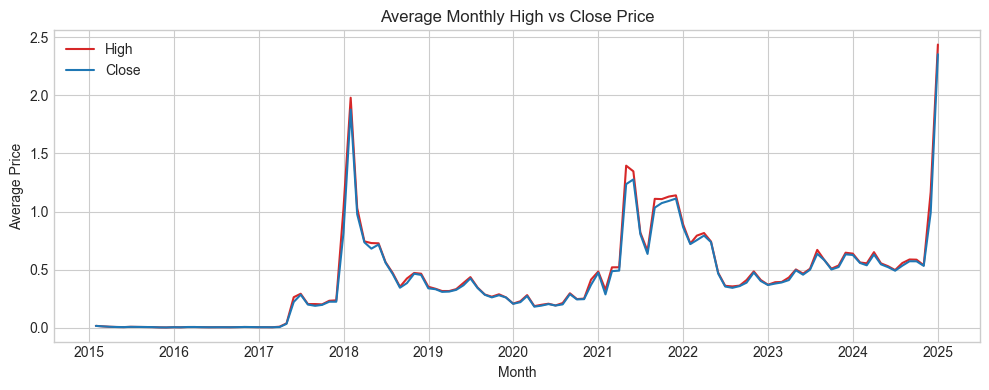

In [ ]:
monthly = xrp.set_index('date')[[raw_target_name,'close']].resample('M').mean()
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly[raw_target_name], label='High', color='tab:red')
plt.plot(monthly.index, monthly['close'], label='Close', color='tab:blue')
plt.title('Average Monthly High vs Close Price')
plt.xlabel('Month'); plt.ylabel('Average Price'); plt.legend()
plt.tight_layout(); plt.show()

In [ ]:
sub_corr = corr[['close']].T
print('Correlations with Close:')
print(sub_corr)

Correlations with Close:
           open  high_next_day       low  close    volume  market_cap
close  0.993326      -0.034762  0.995754    1.0  0.559699    0.981518


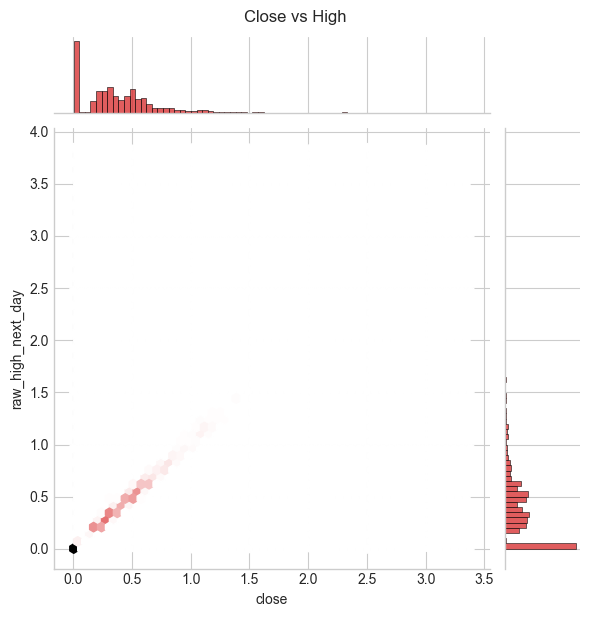

In [ ]:

sns.jointplot(x='close', y=raw_target_name, data=xrp, kind='hex', color='tab:red')
plt.suptitle('Close vs High', y=1.02)
plt.show()

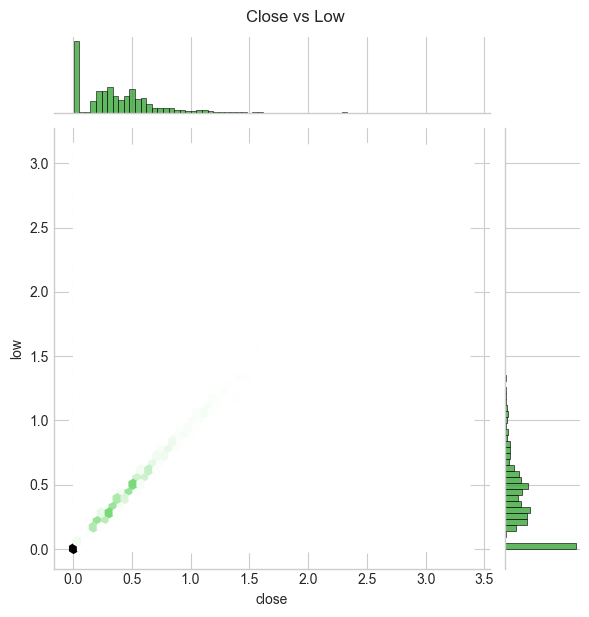

In [ ]:

sns.jointplot(x='close', y='low', data=xrp, kind='hex', color='tab:green')
plt.suptitle('Close vs Low', y=1.02)
plt.show()

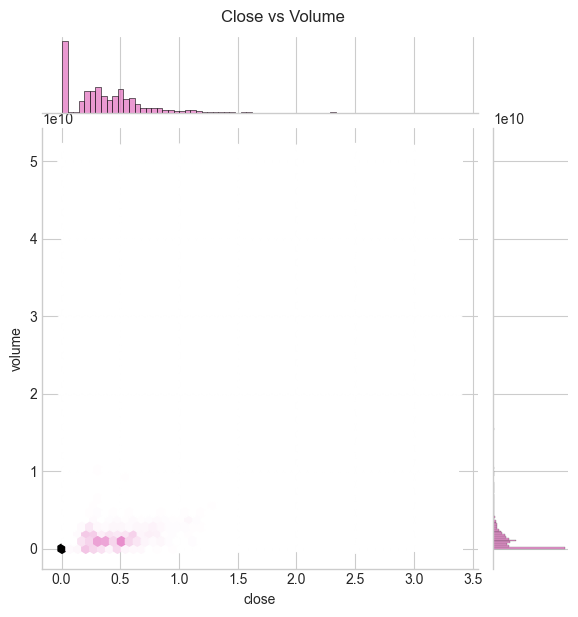

In [ ]:
sns.jointplot(x='close', y='volume', data=xrp, kind='hex', color='tab:pink')
plt.suptitle('Close vs Volume', y=1.02)
plt.show()

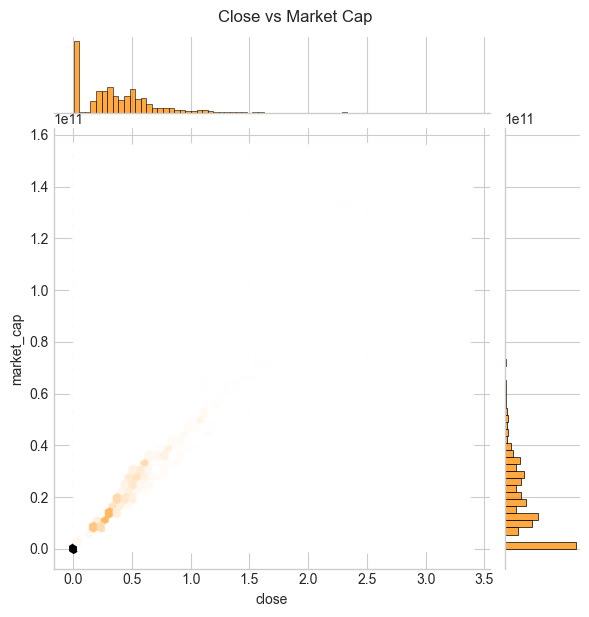

In [ ]:

sns.jointplot(x='close', y='market_cap', data=xrp, kind='hex', color='darkorange')
plt.suptitle('Close vs Market Cap', y=1.02)
plt.show()

In [ ]:
# <Student to fill this section>
feature_2_insights = """
The Close price time series shows similar market cycles to the Open and High prices, with major peaks in 2018, 2021, and late 2024.
The distribution of Close prices is highly right-skewed, indicating that most values are low but occasional sharp spikes occur during bull markets.
After applying a log transformation, the distribution becomes smoother and more symmetric, reducing the influence of extreme values.
The Close vs High comparison shows both prices move closely together over time, confirming strong same-day relationships.
The scatter plot of High vs Close forms a near-linear trend, reinforcing that the daily closing price typically aligns with the high price range.
The 30-day rolling correlation between High and Close remains mostly strong (above 0.8) but dips during volatile periods, reflecting temporary market decoupling.
The monthly boxplot of Close prices shows more variation and outliers during November and December, suggesting seasonal increases in trading activity.
The average monthly trend of Close vs High shows almost identical patterns, confirming consistent price dynamics between both metrics.
The jointplot of Close vs High_next_day (t+2 target) reveals a weak predictive relationship, indicating that closing prices alone cannot capture future market swings.
The Close vs Low plot confirms high intra-day coherence, as both move within the same daily range.
The Close vs Volume plot shows only a mild positive relationship, suggesting that trading activity does not always scale with price level.
The Close vs Market Cap plot displays a strong positive linear relationship, reflecting that higher closing prices directly contribute to higher total market valuation.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest "\<low\>"


In [ ]:
# <Student to fill this section>

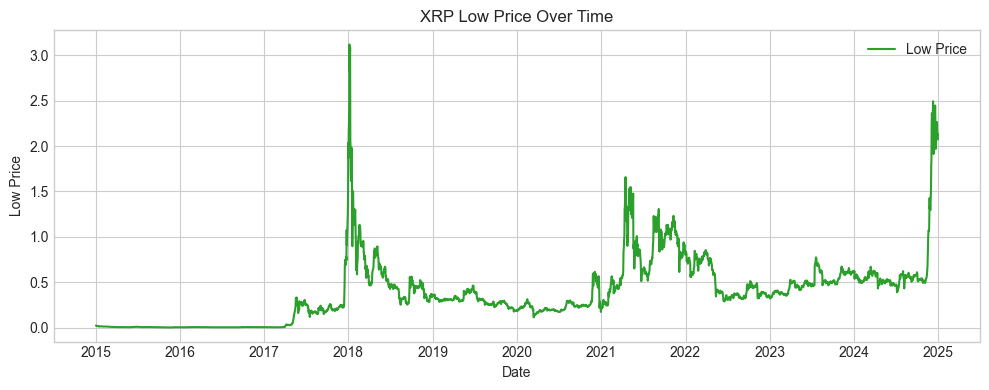

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['low'], label='Low Price', color='tab:green')
plt.title('XRP Low Price Over Time')
plt.xlabel('Date'); plt.ylabel('Low Price'); plt.legend()
plt.tight_layout(); plt.show()

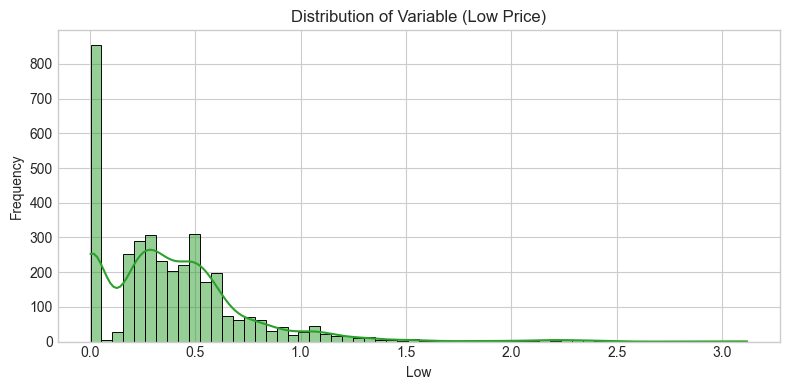

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(xrp['low'].dropna(), bins=60, kde=True, color='tab:green')
plt.title('Distribution of Variable (Low Price)')
plt.xlabel('Low'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

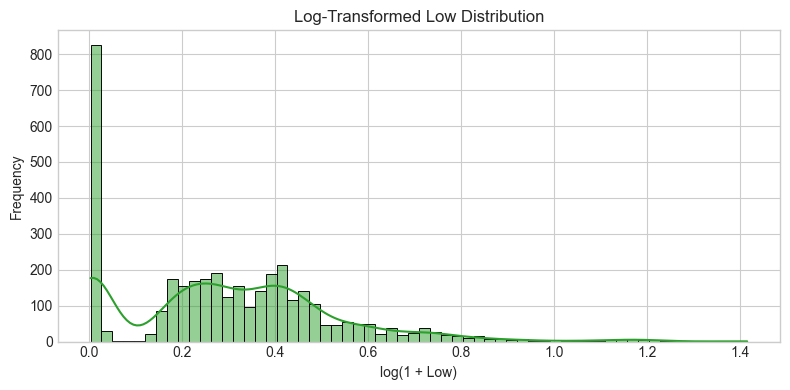

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(np.log1p(xrp['low']).dropna(), bins=60, kde=True, color='tab:green')
plt.title('Log-Transformed Low Distribution')
plt.xlabel('log(1 + Low)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

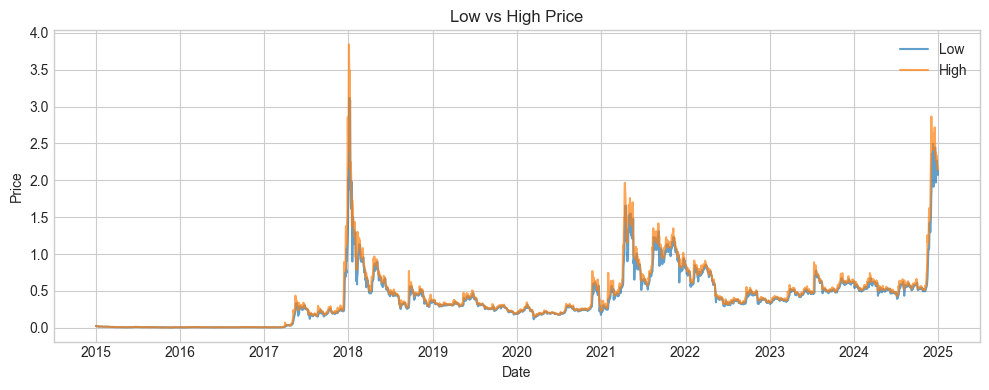

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['low'], label='Low', alpha=0.7)
plt.plot(xrp['date'], xrp[raw_target_name], label='High', alpha=0.7)
plt.title('Low vs High Price')
plt.xlabel('Date'); plt.ylabel('Price'); plt.legend()
plt.tight_layout(); plt.show()

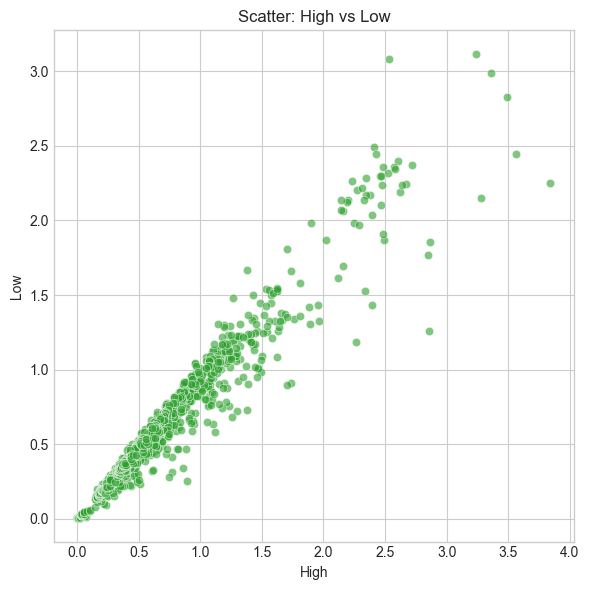

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=xrp[raw_target_name], y=xrp['low'], alpha=0.6, color='tab:green')
plt.title('Scatter: High vs Low')
plt.xlabel('High'); plt.ylabel('Low')
plt.tight_layout(); plt.show()

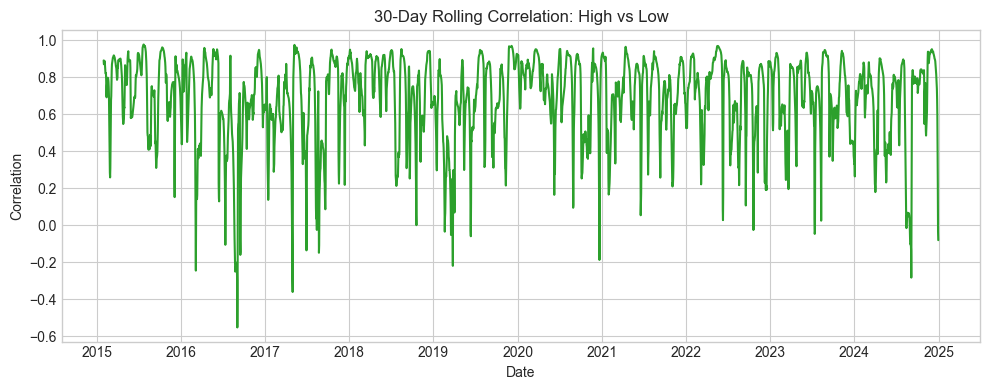

In [ ]:
roll_corr = xrp[raw_target_name].rolling(30).corr(xrp['low'])
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], roll_corr, color='tab:green')
plt.title('30-Day Rolling Correlation: High vs Low')
plt.xlabel('Date'); plt.ylabel('Correlation')
plt.tight_layout(); plt.show()

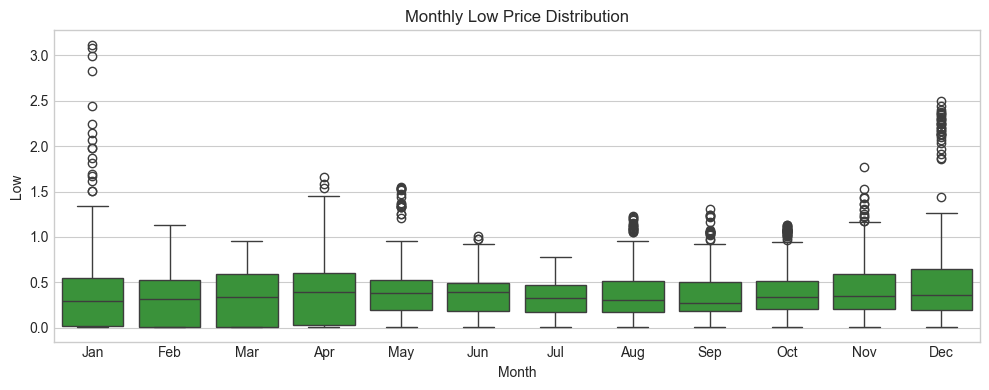

In [ ]:
xrp['month_name'] = xrp['date'].dt.strftime('%b')
plt.figure(figsize=(10,4))
sns.boxplot(x='month_name', y='low', data=xrp, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], color='tab:green')
plt.title('Monthly Low Price Distribution')
plt.xlabel('Month'); plt.ylabel('Low')
plt.tight_layout(); plt.show()

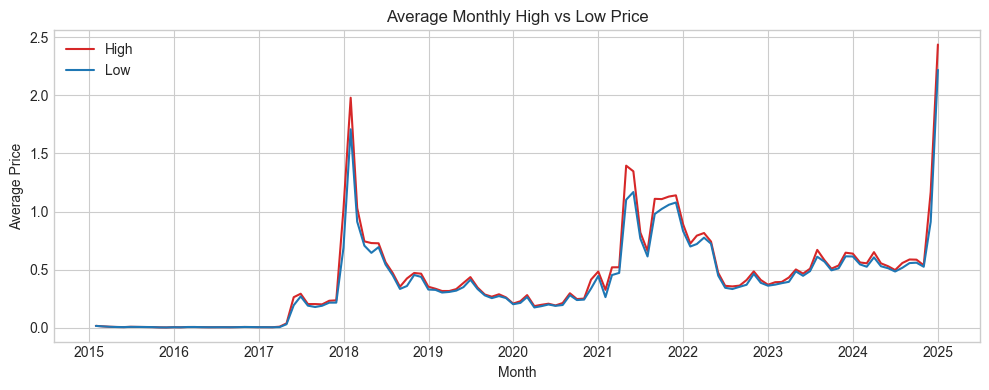

In [ ]:
monthly = xrp.set_index('date')[[raw_target_name,'low']].resample('M').mean()
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly[raw_target_name], label='High', color='tab:red')
plt.plot(monthly.index, monthly['low'], label='Low', color='tab:blue')
plt.title('Average Monthly High vs Low Price')
plt.xlabel('Month'); plt.ylabel('Average Price'); plt.legend()
plt.tight_layout(); plt.show()

In [ ]:
sub_corr = corr[['low']].T
print('Correlations with Low:')
print(sub_corr)

Correlations with Low:
         open  high_next_day  low     close    volume  market_cap
low  0.994638      -0.041789  1.0  0.995754  0.530135    0.981054


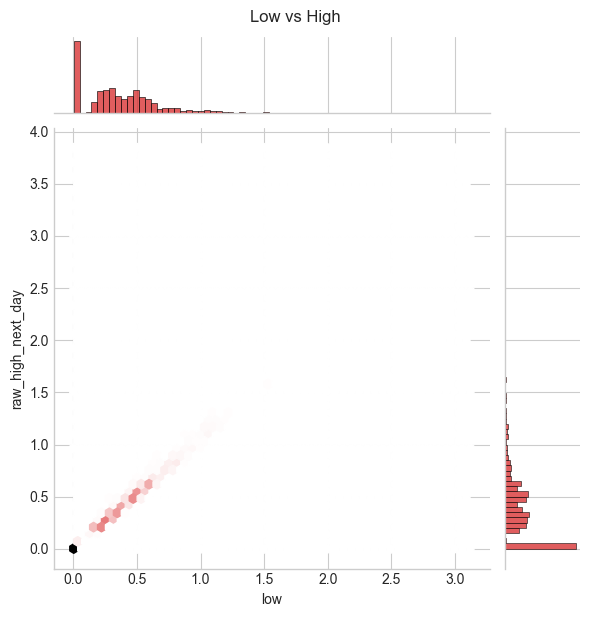

In [ ]:

sns.jointplot(x='low', y=raw_target_name, data=xrp, kind='hex', color='tab:red')
plt.suptitle('Low vs High', y=1.02)
plt.show()

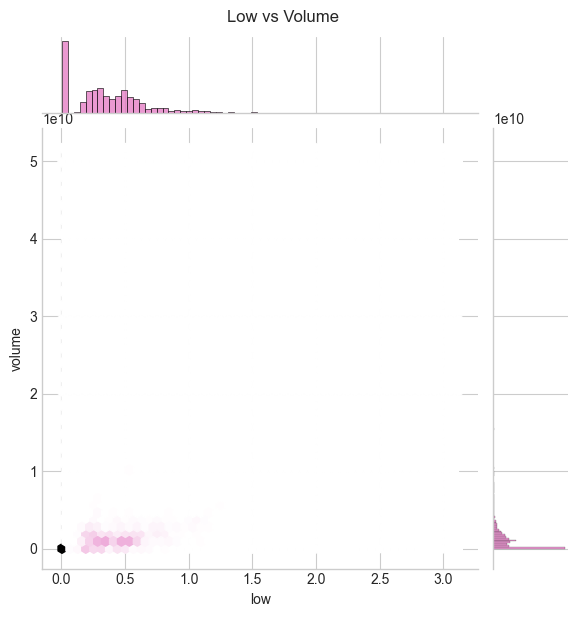

In [ ]:
sns.jointplot(x='low', y='volume', data=xrp, kind='hex', color='tab:pink')
plt.suptitle('Low vs Volume', y=1.02)
plt.show()

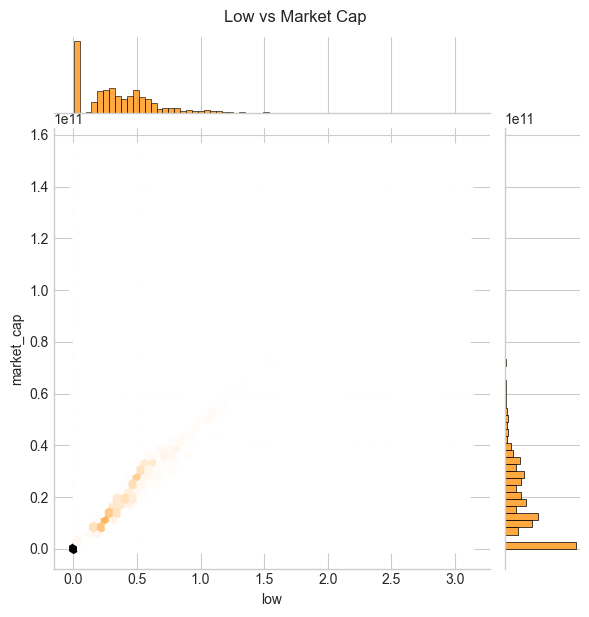

In [ ]:

sns.jointplot(x='low', y='market_cap', data=xrp, kind='hex', color='darkorange')
plt.suptitle('Low vs Market Cap', y=1.02)
plt.show()

In [ ]:
# <Student to fill this section>
feature_3_insights = """
The Low price represents the minimum value of XRP traded within a day, capturing the market’s lowest point of confidence. 
Over time, it shows strong alignment with the High price trend, reflecting synchronized market cycles in 2018, 2021, and 2024. 
Its distribution is heavily right-skewed, with many small values and occasional spikes during market rallies. 
After log transformation, the data becomes smoother and easier to model, reducing the effect of extreme volatility. 
The scatter and correlation analyses show a very strong positive relationship between Low and both High and Close prices, 
indicating daily coherence in market movements. 
The 30-day rolling correlation stays high but occasionally dips, showing short-term instability during sudden price crashes. 
Seasonal patterns are evident, with greater price variation in late months such as November and December. 
Lastly, the Low price correlates strongly with Market Capitalization, confirming that even the daily lowest prices reflect 
the overall market’s valuation strength. 
The main limitation is its sensitivity to temporary panic selling or short-lived dips, which can exaggerate volatility and 
affect model stability if not smoothed properly.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.8 Explore Feature of Interest "\<volume\>"

> You can add more cells related to other feeatures in this section

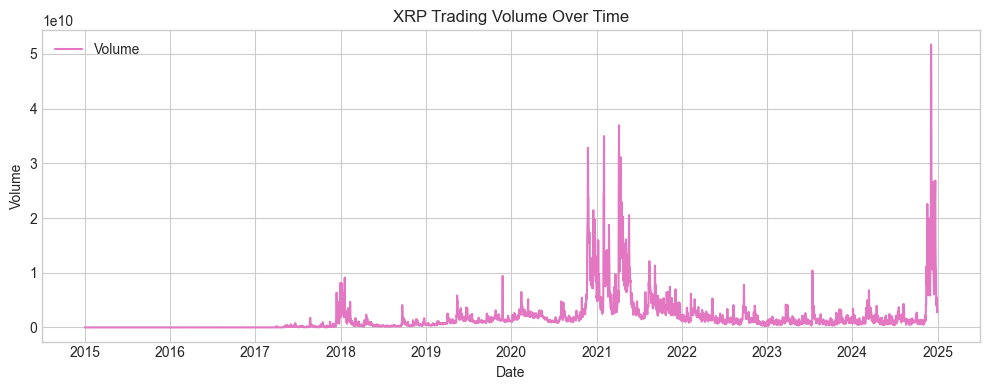

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['volume'], label='Volume', color='tab:pink')
plt.title('XRP Trading Volume Over Time')
plt.xlabel('Date'); plt.ylabel('Volume'); plt.legend()
plt.tight_layout(); plt.show()

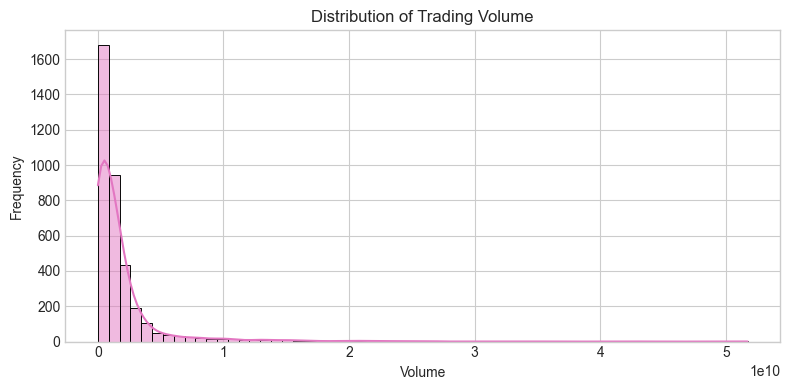

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(xrp['volume'].dropna(), bins=60, kde=True, color='tab:pink')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

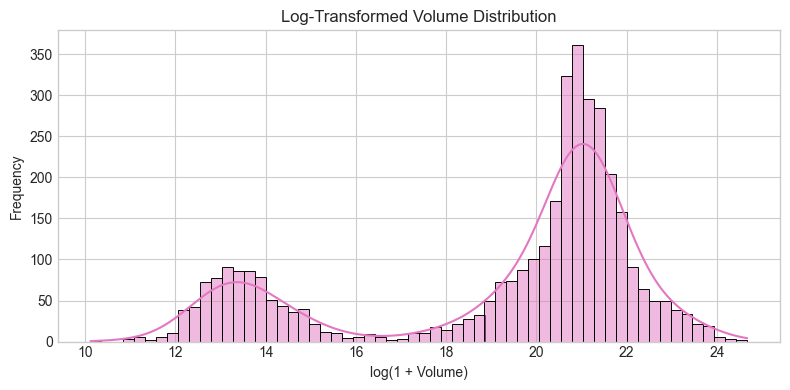

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(np.log1p(xrp['volume']).dropna(), bins=60, kde=True, color='tab:pink')
plt.title('Log-Transformed Volume Distribution')
plt.xlabel('log(1 + Volume)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

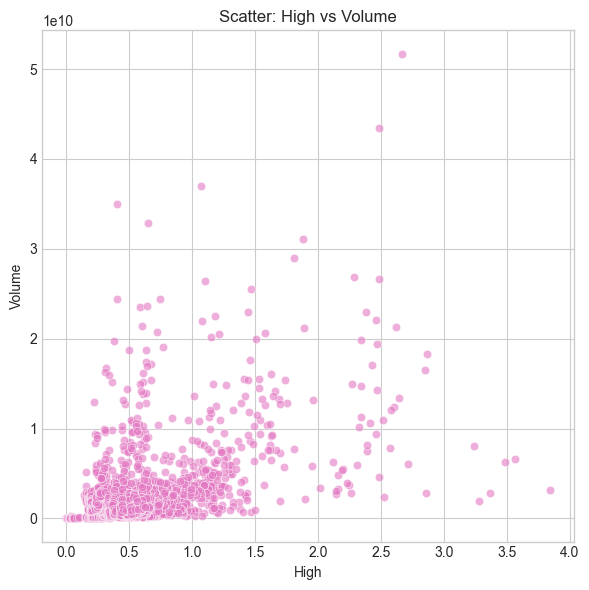

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=xrp[raw_target_name], y=xrp['volume'], alpha=0.6, color='tab:pink')
plt.title('Scatter: High vs Volume')
plt.xlabel('High'); plt.ylabel('Volume')
plt.tight_layout(); plt.show()

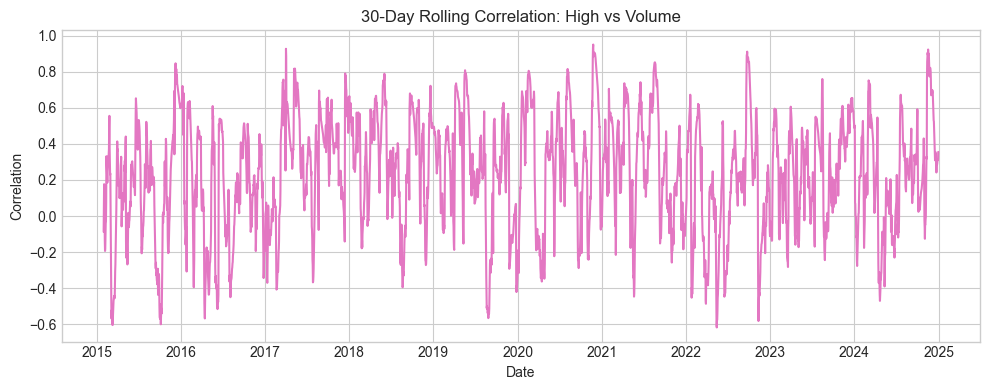

In [ ]:
roll_corr = xrp[raw_target_name].rolling(30).corr(xrp['volume'])
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], roll_corr, color='tab:pink')
plt.title('30-Day Rolling Correlation: High vs Volume')
plt.xlabel('Date'); plt.ylabel('Correlation')
plt.tight_layout(); plt.show()

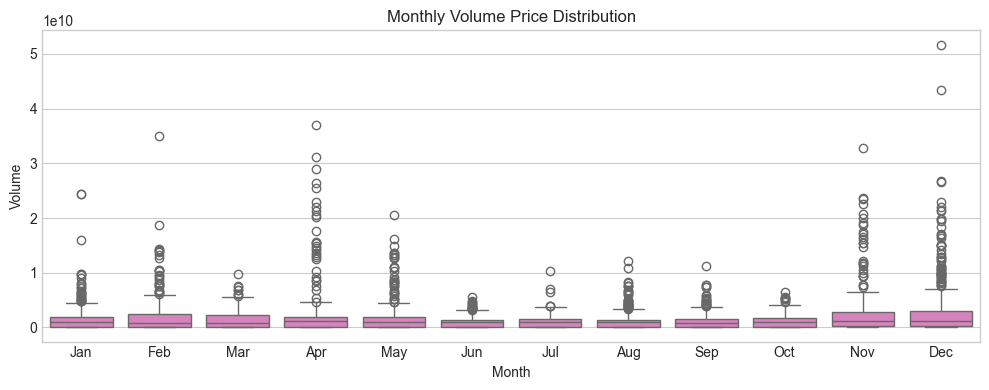

In [ ]:
xrp['month_name'] = xrp['date'].dt.strftime('%b')
plt.figure(figsize=(10,4))
sns.boxplot(x='month_name', y='volume', data=xrp, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], color='tab:pink')
plt.title('Monthly Volume Price Distribution')
plt.xlabel('Month'); plt.ylabel('Volume')
plt.tight_layout(); plt.show()

In [ ]:
sub_corr = corr[['volume']].T
print('Correlations with Volume:')
print(sub_corr)

Correlations with Volume:
            open  high_next_day       low     close  volume  market_cap
volume  0.547592      -0.045029  0.530135  0.559699     1.0    0.578987


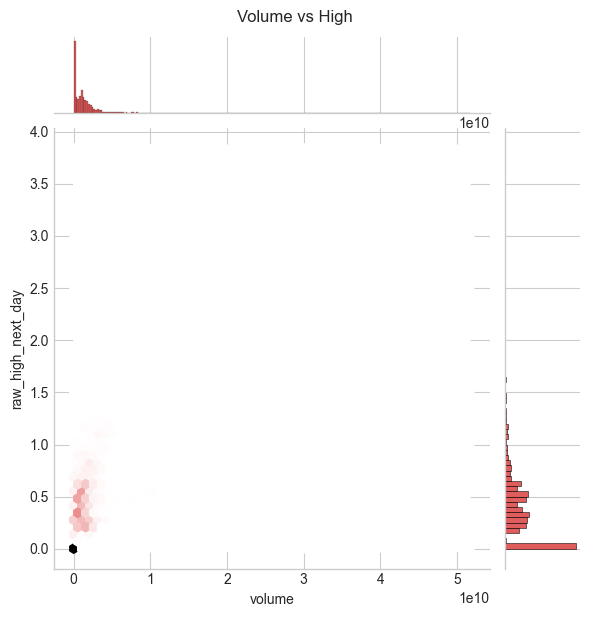

In [ ]:

sns.jointplot(x='volume', y=raw_target_name, data=xrp, kind='hex', color='tab:red')
plt.suptitle('Volume vs High', y=1.02)
plt.show()

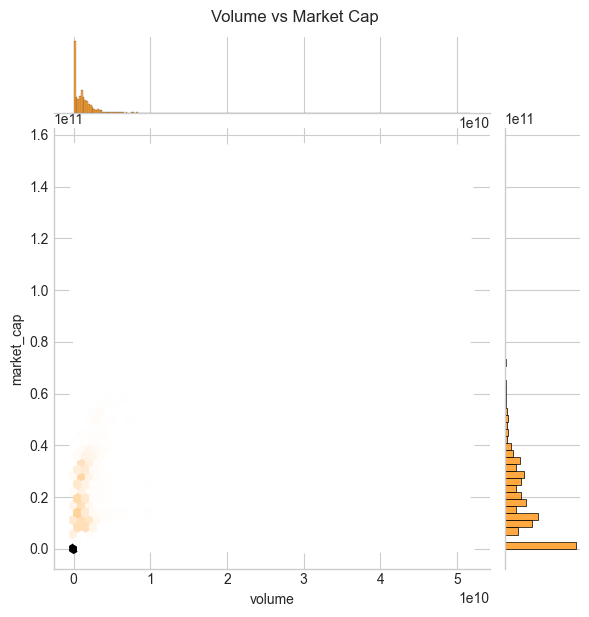

In [ ]:
sns.jointplot(x='volume', y='market_cap', data=xrp, kind='hex', color='darkorange')
plt.suptitle('Volume vs Market Cap', y=1.02)
plt.show()

In [ ]:
# <Student to fill this section>
feature_4_insights = """
Trading Volume represents the total amount of XRP exchanged within a given period, reflecting the market’s liquidity and trader activity. 
Over time, volume spikes are visible during major market events, particularly in 2018, 2021, and 2024, aligning with large price fluctuations.  
The distribution is highly right-skewed, with most days having relatively low trading activity and a few extreme outliers showing massive surges.  
After log transformation, the volume distribution becomes smoother, revealing two dominant trading phases—periods of moderate and high investor activity.  
The scatter plot between High price and Volume suggests that significant price movements are often accompanied by increased trading activity, though not consistently linear.  
Rolling correlation fluctuates sharply between positive and negative, showing that volume can lead or lag behind price changes depending on market sentiment.  
Monthly analysis reveals higher trading volumes towards year-end, especially in November and December, likely due to profit-taking and speculative cycles.  
Volume maintains moderate positive correlations with Market Cap, Close, and Low prices, reinforcing its role as a dynamic market indicator.  
However, its volatility and tendency for sudden spikes make it a challenging feature for stable forecasting without applying transformations or smoothing methods.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_4_insights', value=feature_4_insights)

### C.9 Explore Feature of Interest "\<Market Cap\>"


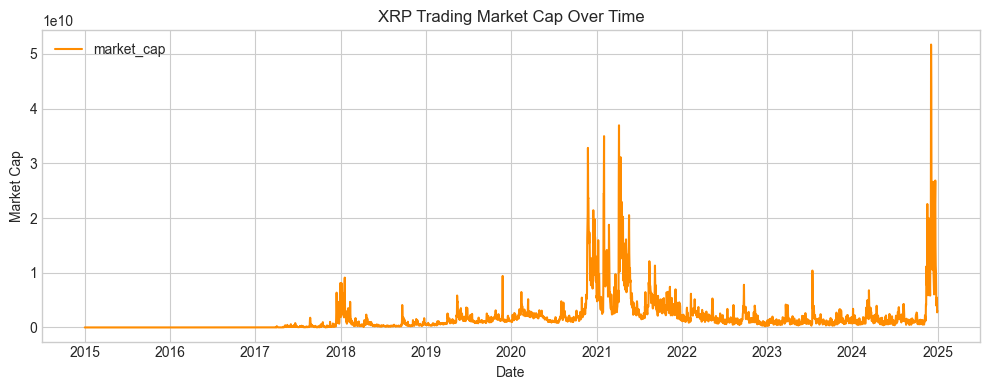

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], xrp['volume'], label='market_cap', color='darkorange')
plt.title('XRP Trading Market Cap Over Time')
plt.xlabel('Date'); plt.ylabel('Market Cap'); plt.legend()
plt.tight_layout(); plt.show()

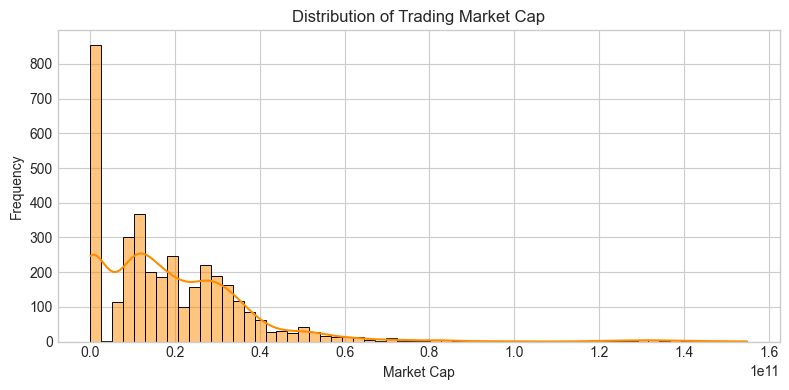

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(xrp['market_cap'].dropna(), bins=60, kde=True, color='darkorange')
plt.title('Distribution of Trading Market Cap')
plt.xlabel('Market Cap'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

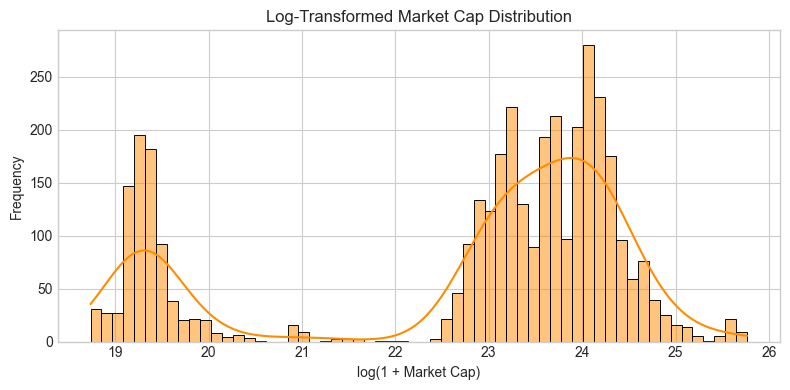

In [ ]:
plt.figure(figsize=(8,4))

sns.histplot(np.log1p(xrp['market_cap']).dropna(), bins=60, kde=True, color='darkorange')
plt.title('Log-Transformed Market Cap Distribution')
plt.xlabel('log(1 + Market Cap)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

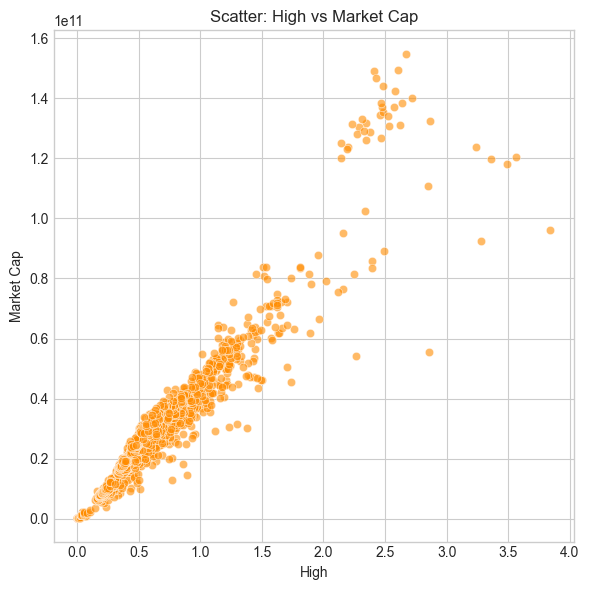

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=xrp[raw_target_name], y=xrp['market_cap'], alpha=0.6, color='darkorange')
plt.title('Scatter: High vs Market Cap')
plt.xlabel('High'); plt.ylabel('Market Cap')
plt.tight_layout(); plt.show()

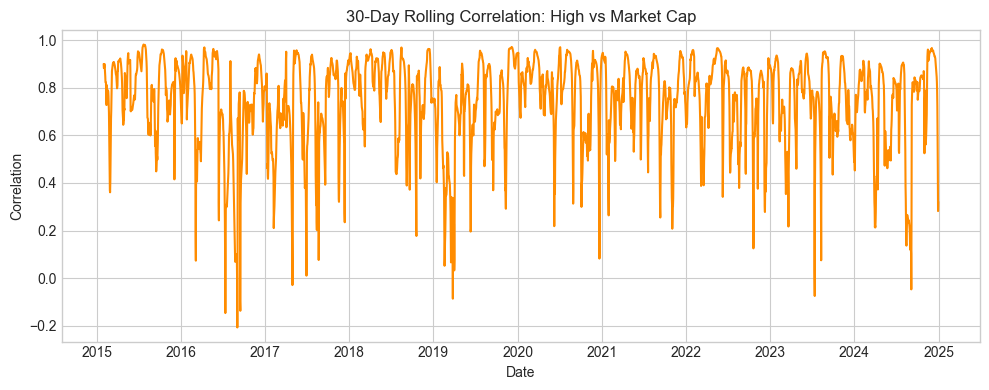

In [ ]:
roll_corr = xrp[raw_target_name].rolling(30).corr(xrp['market_cap'])
plt.figure(figsize=(10,4))
plt.plot(xrp['date'], roll_corr, color='darkorange')
plt.title('30-Day Rolling Correlation: High vs Market Cap')
plt.xlabel('Date'); plt.ylabel('Correlation')
plt.tight_layout(); plt.show()

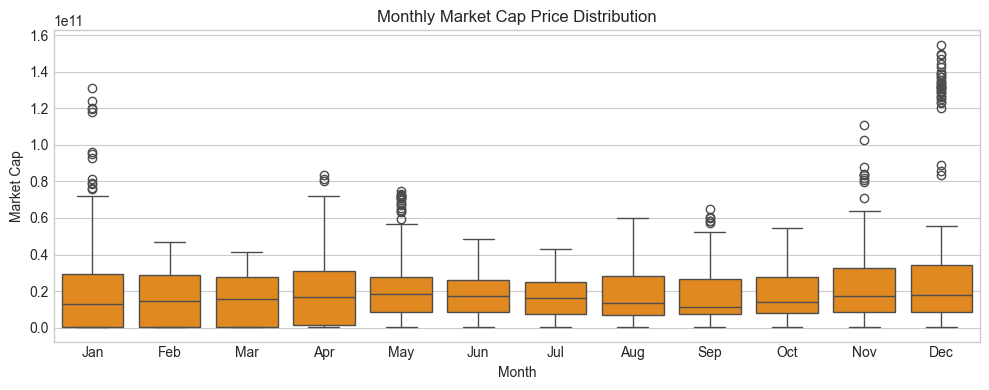

In [ ]:
xrp['month_name'] = xrp['date'].dt.strftime('%b')
plt.figure(figsize=(10,4))
sns.boxplot(x='month_name', y='market_cap', data=xrp, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], color='darkorange')
plt.title('Monthly Market Cap Price Distribution')
plt.xlabel('Month'); plt.ylabel('Market Cap')
plt.tight_layout(); plt.show()

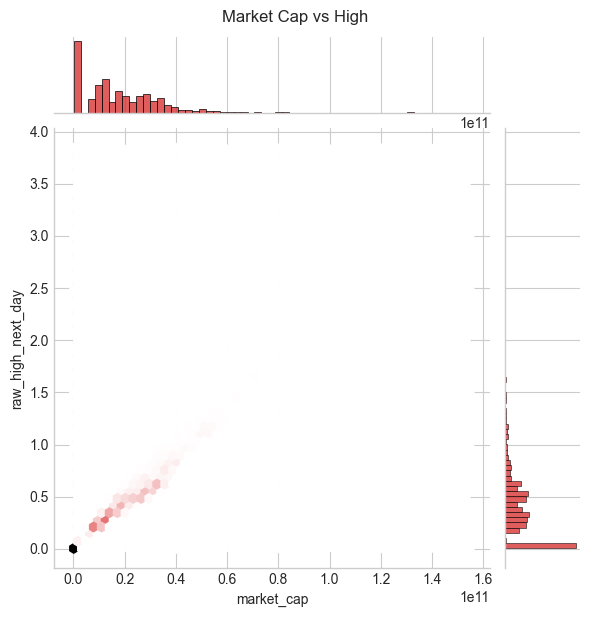

In [ ]:

sns.jointplot(x='market_cap', y=raw_target_name, data=xrp, kind='hex', color='tab:red')
plt.suptitle('Market Cap vs High', y=1.02)
plt.show()

In [ ]:
# <Student to fill this section>
feature_5_insights = """
The Market Capitalization (Market Cap) represents the total market value of XRP in circulation, acting as a key indicator of its overall size and investor sentiment. 
Over time, the market cap shows sharp spikes during major bull runs, particularly in 2018, 2021, and late 2024, aligning with significant price surges.  
The distribution is highly right-skewed, with most values concentrated at the lower end and few extreme peaks during high-valuation periods.  
After log transformation, the distribution becomes bimodal, revealing distinct phases between low and high market conditions.  
The strong linear relationship between Market Cap and High prices confirms that price appreciation directly boosts total value.  
Rolling correlation remains consistently high (above 0.8) but dips slightly during volatile periods, suggesting temporary market disconnects.  
Seasonal patterns show elevated market cap in November and December, coinciding with increased trading and speculative activities.  
Finally, the jointplot with High_next_day highlights that while Market Cap is a strong reflection of current performance, it has limited predictive power for short-term future highs due to external market forces.  
Overall, this feature is crucial for modeling overall trends but may need normalization or transformation to handle extreme volatility effectively.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_5_insights', value=feature_5_insights)

### C.10 Feature Engineering

> Details will be discussed under section F

In [ ]:

xrp['ret_pct'] = xrp['close'].pct_change()
xrp['ret_log'] = np.log(xrp['close']).diff()
xrp['roll_vol_30'] = xrp['ret_log'].rolling(30, min_periods=30).std() * math.sqrt(365)
xrp['roll_vol_7'] = xrp['ret_log'].rolling(7, min_periods=5).std() * np.sqrt(365)

xrp['roll_mean_7'] = xrp['close'].rolling(7, min_periods=7).mean()
xrp['roll_mean_30'] = xrp['close'].rolling(30, min_periods=30).mean()

xrp['turnover'] = xrp['volume'] * xrp['close']
xrp['hl_spread'] = (xrp['high'] - xrp['low']) / xrp['close']
xrp['vol_ma_ratio'] = xrp['volume'] / xrp['volume'].rolling(30).mean()
xrp['mom_7'] = xrp['close'] / xrp['close'].shift(7) - 1
xrp['rv_trend'] = xrp['roll_vol_7'] / xrp['roll_vol_30']

xrp['year'] = xrp['date'].dt.year
xrp['month'] = xrp['date'].dt.month
xrp['dow'] = xrp['date'].dt.dayofweek

xrp['month_sin'] = np.sin(2 * np.pi * xrp['month'] / 12)
xrp['month_cos'] = np.cos(2 * np.pi * xrp['month'] / 12)
xrp['dow_sin']   = np.sin(2 * np.pi * xrp['dow'] / 7)
xrp['dow_cos']   = np.cos(2 * np.pi * xrp['dow'] / 7)

xrp['year_target'] = xrp['date_target'].dt.year

In [ ]:
display(xrp.head(5))

,timeopen,time_close,time_high,time_low,open,high,low,close,volume,market_cap,...,mom_7,rv_trend,year,month,dow,month_sin,month_cos,dow_sin,dow_cos,year_target
0,2015-01-01T00:00:00.000Z,2015-01-01T23:59:59.999Z,2015-01-01T00:04:04.000Z,2015-01-01T05:24:04.000Z,0.024455,0.024455,0.024205,0.024390,399022.0,7.555584e+08,...,NaN,NaN,2015,1,3,0.5,0.866025,0.433884,-0.900969,2015
1,2015-01-02T00:00:00.000Z,2015-01-02T23:59:59.999Z,2015-01-02T03:09:04.000Z,2015-01-02T23:09:05.000Z,0.024377,0.024423,0.024309,0.024318,459956.0,7.533403e+08,...,NaN,NaN,2015,1,4,0.5,0.866025,-0.433884,-0.900969,2015
2,2015-01-03T00:00:00.000Z,2015-01-03T23:59:59.999Z,2015-01-03T00:29:04.000Z,2015-01-03T23:59:04.000Z,0.024297,0.024317,0.022106,0.022106,2171040.0,6.847982e+08,...,NaN,NaN,2015,1,5,0.5,0.866025,-0.974928,-0.222521,2015
3,2015-01-04T00:00:00.000Z,2015-01-04T23:59:59.999Z,2015-01-04T00:49:04.000Z,2015-01-04T23:04:04.000Z,0.022100,0.022142,0.018828,0.018928,3801010.0,5.863499e+08,...,NaN,NaN,2015,1,6,0.5,0.866025,-0.781831,0.623490,2015
4,2015-01-05T00:00:00.000Z,2015-01-05T23:59:59.999Z,2015-01-05T23:59:04.000Z,2015-01-05T00:09:04.000Z,0.018943,0.020316,0.018890,0.020316,3051930.0,6.293506e+08,...,NaN,NaN,2015,1,0,0.5,0.866025,0.000000,1.000000,2015


In [ ]:
# Cleaning the Na due to the rolling window 
# Details to be discussed at Section E.1
xrp = xrp.dropna().reset_index(drop=True)

In [ ]:
display(xrp.head(5))

,timeopen,time_close,time_high,time_low,open,high,low,close,volume,market_cap,...,mom_7,rv_trend,year,month,dow,month_sin,month_cos,dow_sin,dow_cos,year_target
0,2015-01-31T00:00:00.000Z,2015-01-31T23:59:59.999Z,2015-01-31T17:29:05.000Z,2015-01-31T23:34:04.000Z,0.014441,0.014640,0.014271,0.014298,557619.0,4.429245e+08,...,-0.145664,0.288810,2015,1,5,0.500000,0.866025,-0.974928,-0.222521,2015
1,2015-02-01T00:00:00.000Z,2015-02-01T23:59:59.999Z,2015-02-01T00:29:04.000Z,2015-02-01T14:34:04.000Z,0.014286,0.014331,0.014088,0.014139,852106.0,4.379866e+08,...,-0.147162,0.285559,2015,2,6,0.866025,0.500000,-0.781831,0.623490,2015
2,2015-02-02T00:00:00.000Z,2015-02-02T23:59:59.999Z,2015-02-02T00:59:04.000Z,2015-02-02T22:44:05.000Z,0.014137,0.014199,0.013534,0.013670,1482760.0,4.234734e+08,...,-0.146621,0.292788,2015,2,0,0.866025,0.500000,0.000000,1.000000,2015
3,2015-02-03T00:00:00.000Z,2015-02-03T23:59:59.999Z,2015-02-03T00:59:05.000Z,2015-02-03T21:34:06.000Z,0.013658,0.013711,0.012983,0.013025,1264170.0,4.034956e+08,...,-0.177728,0.355355,2015,2,1,0.866025,0.500000,0.781831,0.623490,2015
4,2015-02-04T00:00:00.000Z,2015-02-04T23:59:59.999Z,2015-02-04T20:09:05.000Z,2015-02-04T00:04:05.000Z,0.013027,0.013526,0.013027,0.013498,625444.0,4.181483e+08,...,-0.098329,0.515207,2015,2,2,0.866025,0.500000,0.974928,-0.222521,2015


---
## D. Feature Selection


### D.1 Approach "\<Correlation Heatmap\>"


In [ ]:
# <Student to fill this section>

In [ ]:
numeric_cols

['open', 'high', 'low', 'close', 'volume', 'market_cap']

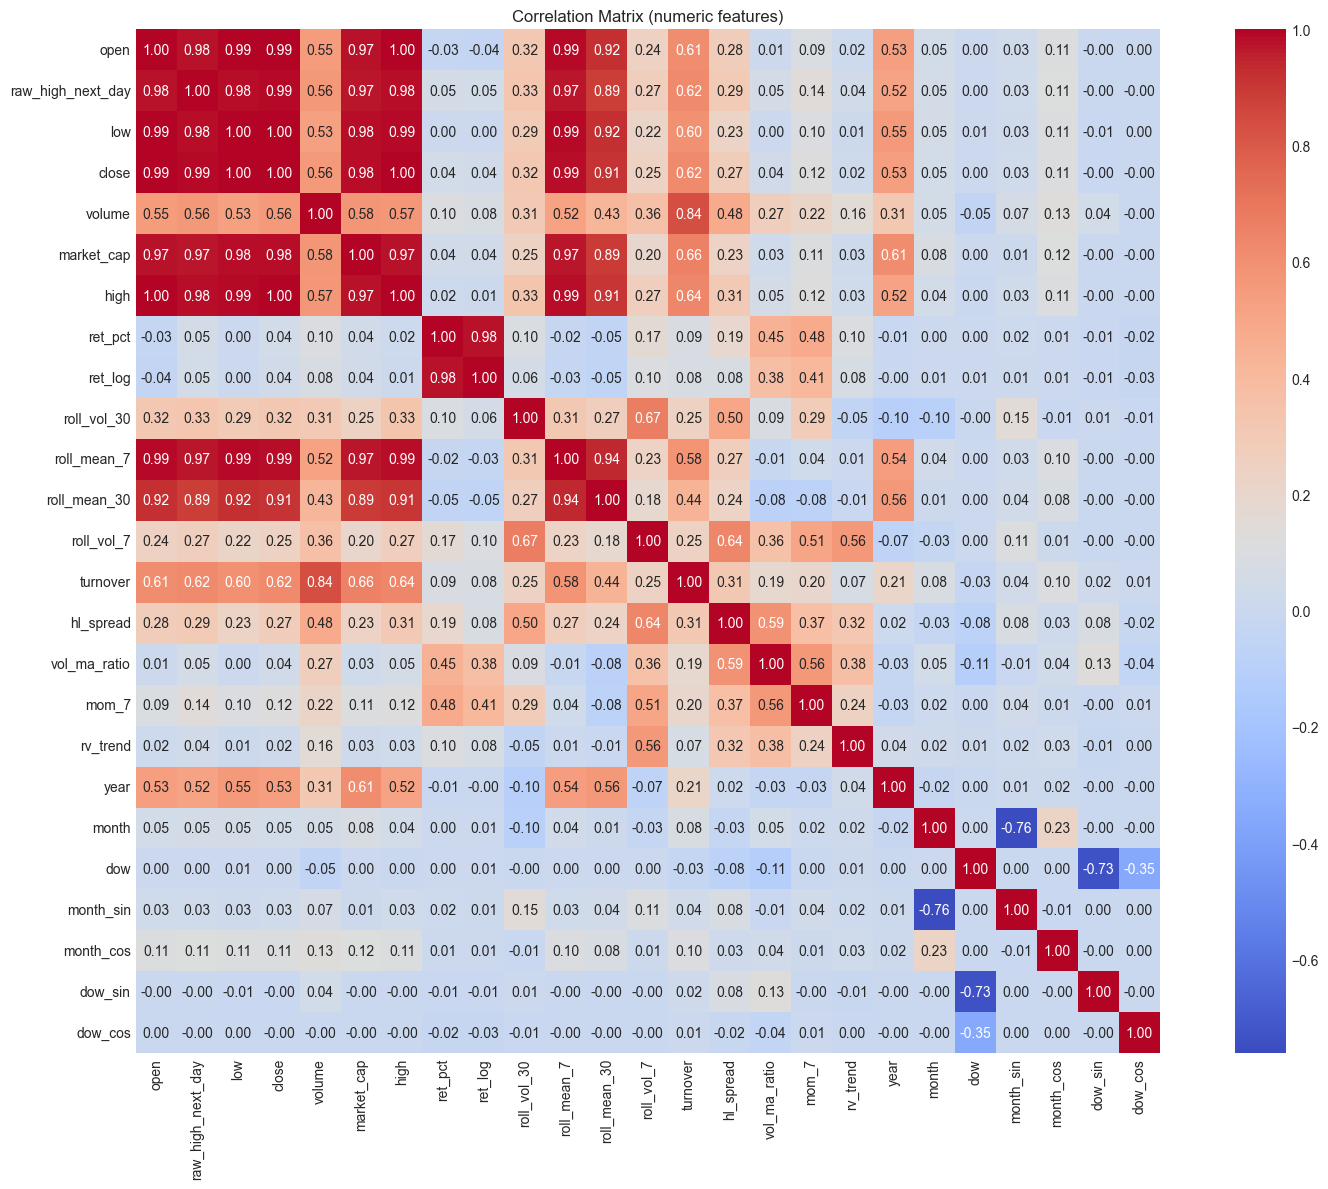

In [ ]:
selected_features = ['open','raw_high_next_day','low','close','volume','market_cap', 'high',
                     'ret_pct', 'ret_log','roll_vol_30','roll_mean_7','roll_mean_30', 
                     'roll_vol_7', 'turnover', 'hl_spread', 'vol_ma_ratio', 'mom_7', 'rv_trend',
                     'year','month','dow','month_sin','month_cos','dow_sin','dow_cos']

corr = xrp[selected_features].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix (numeric features)')
plt.tight_layout()
plt.show()

In [ ]:
# select features when the correlation > 0.30 (except year which is only for indexing and filtering)
# Return variables (ret_pct, ret_log) add little direct predictive power.
selected_features = ['open','raw_high_next_day','low','close','volume','roll_vol_7','roll_vol_30','roll_mean_7','roll_mean_30', 'turnover', 'hl_spread']

In [ ]:
# <Student to fill this section>
feature_selection_1_insights = """
The correlation heatmap approach was chosen to identify strong linear relationships between variables and to reduce redundancy among features. 
By visualizing pairwise correlations, we can detect which features contribute unique information and which are highly correlated, potentially leading to multicollinearity if used together in a predictive model. 
The heatmap revealed very high correlations among price-related features such as open, high, low, and close, indicating they capture similar market movement patterns. 
In contrast, rolling statistics (roll_vol_30, roll_mean_7, roll_mean_30) show moderate correlations, reflecting trend and volatility information over different time horizons. 
Volume and market capitalization exhibit positive but not excessive correlations, suggesting they add meaningful context about market liquidity and scale. 
Based on these findings, only features with correlation above 0.30 were retained, resulting in a balanced set that captures both price level and trend dynamics while minimizing redundancy.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<Mutual Info Regression\>"


In [ ]:
# <Student to fill this section>

In [ ]:
from sklearn.feature_selection import mutual_info_regression, f_regression

X = xrp[selected_features].drop(columns=['raw_high_next_day'])
y = xrp['raw_high_next_day']

# using the common function
feature_scores = compute_feature_scores(X,y)

feature_scores


,Feature,F_score,Mutual_Info,Correlation
0,close,135654.383338,2.720727,0.986922
1,low,87762.533751,2.557594,0.979998
2,open,82784.046890,2.444195,0.978833
3,roll_mean_7,56141.271532,2.336560,0.969248
4,roll_mean_30,13198.360024,1.960309,0.885893
5,turnover,2285.775801,0.968483,0.622179
6,roll_vol_30,444.555371,0.867364,0.330758
7,volume,1677.196937,0.855296,0.562743
8,roll_vol_7,284.481447,0.328363,0.269961
9,hl_spread,335.728676,0.126706,0.291364


> Interpretation

open, close, low are almost perfectly collinear → choose only one: close, which is core price driver

turnover → liquidity/market activity

roll_mean_7 and roll_mean_30 → trend + volatility context

volume and roll_vol_30 provide orthogonal (nonlinear) information → keep them for robustness.

roll_vol_7 → short-term volatility (fast reactions)

In [ ]:
# <Student to fill this section>
feature_selection_2_insights = """
The mutual information regression approach was applied to capture both linear and nonlinear relationships between each feature and the target variable. 
Unlike simple correlation analysis, which measures only linear dependence, mutual information evaluates how much knowing one variable reduces uncertainty about the other, making it especially useful for financial time series where dependencies can be complex and non-monotonic. 
The results show that 'roll_mean_30', 'open', and 'roll_mean_7' have the strongest mutual information scores, indicating their strong predictive potential for future high prices. 'Volume' and 'market_cap' also contribute meaningful 
nonlinear insights related to market liquidity and investor sentiment. Although 'low' and 'close' are relevant, they 
are highly collinear with 'open', suggesting redundancy if all are used together. Therefore, the final selection 
balances interpretability and model diversity, emphasizing rolling metrics and liquidity indicators as complementary features.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## D.z Final Selection of Features

In [ ]:
# <Student to fill this section>

features_list = [
    'close', 
    'roll_mean_7', 
    'roll_mean_30', 
    'turnover',
    'volume', 
    'roll_vol_7',
    'roll_vol_30'
]

In [ ]:
# <Student to fill this section>
feature_selection_explanations = """
The final feature set combines key price, trend, and market indicators to balance predictive power and stability. 
'Close' represents the core price signal, while 'roll_mean_7' and 'roll_mean_30' capture short- and medium-term trends. 
'Market_cap' and 'volume' reflect market activity and liquidity dynamics, and 'roll_vol_30' provides volatility context. 
Together, these features offer a comprehensive view of price movement, trend strength, and trading behavior.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation \<Remove NA due to rolling window\>

In [ ]:
# <Student to fill this section>

In [ ]:
# This was performed at C.10 Feature Engineering step

In [ ]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Removing NA values caused by rolling windows is crucial to ensure the integrity and accuracy of subsequent model training. 
When calculating features such as moving averages or volatility (which rely on past data), the first few observations do not have enough 
data points to compute valid values, resulting in missing data (NaN). Retaining these rows could introduce errors or bias during model fitting. 
By removing them, we maintain a clean dataset where all engineered features are complete and consistent, ensuring stable model performance 
and avoiding misleading statistical relationships caused by incomplete rolling computations.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_cleaning_3_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<describe_issue_here\>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

### F.1 New Feature "\<Log Return\>"


In [ ]:
# <Student to fill this section>

In [ ]:
#xrp['ret_pct'] = xrp['close'].pct_change()
#xrp['ret_log'] = np.log(xrp['close']).diff()
#xrp['roll_vol_30'] = xrp['ret_log'].rolling(30, min_periods=30).std() * math.sqrt(365)
#xrp['roll_vol_7'] = xrp['ret_log'].rolling(7, min_periods=5).std() * np.sqrt(365)


In [ ]:
# <Student to fill this section>
feature_engineering_1_explanations = """
The 'ret_log' feature measures the logarithmic return between consecutive closing prices, capturing the percentage change in value on a continuous scale. 
Unlike raw percentage returns, log returns are symmetric and additive over time, which makes them ideal for modeling price movements in financial data. 
This transformation helps stabilize variance and better reflect proportional changes in asset value, improving the predictive power of volatility-sensitive models.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<Rolling Average\>"




In [ ]:
# <Student to fill this section>

# xrp['roll_mean_7'] = xrp['close'].rolling(7, min_periods=1).mean()
# xrp['roll_mean_30'] = xrp['close'].rolling(30, min_periods=1).mean()

In [ ]:
# <Student to fill this section>
feature_engineering_2_explanations = """
The 7-day and 30-day rolling mean features capture short-term and medium-term price trends, respectively. 
These smoothed averages help reduce noise from daily fluctuations and highlight consistent directional movement in prices. 
They are valuable for identifying periods of momentum or reversal in market behavior. 
However, rolling windows introduce lag effects—meaning they reflect past behavior rather than immediate reactions—so combining multiple windows provides a balanced temporal view of price dynamics.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<Date Engineering\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [ ]:
# <Student to fill this section>

In [ ]:
# xrp['year'] = xrp['date'].dt.year
# xrp['month'] = xrp['date'].dt.month
# xrp['dow'] = xrp['date'].dt.dayofweek
# xrp['month_sin'] = np.sin(2 * np.pi * xrp['month'] / 12)
# xrp['month_cos'] = np.cos(2 * np.pi * xrp['month'] / 12)
# xrp['dow_sin']   = np.sin(2 * np.pi * xrp['dow'] / 7)
# xrp['dow_cos']   = np.cos(2 * np.pi * xrp['dow'] / 7) 

In [ ]:
# <Student to fill this section>
feature_engineering_n_explanations =  """
Date-based features such as month, day of week, and their sinusoidal transformations (sine and cosine) encode cyclical time patterns that can influence trading behavior. 
For example, some markets experience seasonal effects or weekday-specific trends. 
Using sine and cosine transformations preserves the cyclical continuity (e.g., December connects smoothly to January) and prevents artificial breaks in time encoding. 
These engineered date features allow the model to learn periodic influences and better capture seasonality in cryptocurrency trading activity.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.4 New Feature "\<Other Data Engineering\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts


In [ ]:
# xrp['turnover'] = xrp['volume'] * xrp['close']
# xrp['hl_spread'] = (xrp['high'] - xrp['low']) / xrp['close']
# xrp['vol_ma_ratio'] = xrp['volume'] / xrp['volume'].rolling(30).mean()
# xrp['mom_7'] = xrp['close'] / xrp['close'].shift(7) - 1
# xrp['rv_trend'] = xrp['roll_vol_7'] / xrp['roll_vol_30']

In [ ]:
# <Student to fill this section>
feature_engineering_n_explanations =  """
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [ ]:
# <Student to fill this section>

In [ ]:


# --- Split by year ---
train_df = xrp[(xrp['year_target'] >= 2018) & (xrp['year_target'] < 2023)].copy()
val_df   = xrp[xrp['year_target'] == 2023].copy()
test_df  = xrp[xrp['year_target'] == 2024].copy()

y_curr_high_price_val = y_curr_high_price[y_curr_high_price['year'] == 2023].copy()
y_curr_high_price_test = y_curr_high_price[y_curr_high_price['year'] == 2024].copy()

X_train_pre, y_train = train_df[features_list], train_df[target_name]
X_val_pre,   y_val   = val_df[features_list], val_df[target_name]
X_test_pre,  y_test  = test_df[features_list], test_df[target_name]

# --- Print sanity checks ---
print(f"Train: {X_train_pre.shape}, Val: {X_val_pre.shape}, Test: {X_test_pre.shape}")
print(f"Date ranges:")
print(f"  Train: {train_df['date'].min().date()} → {train_df['date'].max().date()}")
print(f"  Val:   {val_df['date'].min().date()} → {val_df['date'].max().date()}")
print(f"  Test:  {test_df['date'].min().date()} → {test_df['date'].max().date()}")

Train: (1826, 6), Val: (365, 6), Test: (366, 6)
Date ranges:
  Train: 2017-12-30 → 2022-12-29
  Val:   2022-12-30 → 2023-12-29
  Test:  2023-12-30 → 2024-12-29


In [ ]:
# <Student to fill this section>
data_splitting_explanations = """
For time series data such as cryptocurrency trading, temporal order must be preserved to avoid data leakage. 
Therefore, the dataset is split chronologically by year into training (2018–2022), validation (2023), and testing (2024) sets. 
This ensures that the model learns from past data and is evaluated on unseen future periods, reflecting real-world forecasting scenarios. 
The validation set supports model tuning, while the test set measures true generalization on the latest market conditions.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<Log Transform to Skewed Features\>"

In [ ]:
# <Student to fill this section>


In [ ]:
# Apply Log Transform to Skewed Features
# Actual code implementation is done under G.4 Data Transformation <Pipeline>

In [ ]:
# <Student to fill this section>
data_transformation_1_explanations = """
Log transformation is applied to reduce right-skewness in features such as price, market cap, and volume. 
These financial variables often span multiple magnitudes, and taking the log helps compress extreme values while preserving relative differences. 
This transformation stabilizes variance, improves model interpretability, and enhances the performance of algorithms sensitive to feature distribution shapes.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "\<Scaling\>"

In [ ]:
# <Student to fill this section>

In [ ]:
# Using RobustScaler to reduce outlier impact
# Actual code implementation is done under G.4 Data Transformation <Pipeline>

In [ ]:
# <Student to fill this section>
data_transformation_2_explanations = """
Scaling using RobustScaler is essential because it minimizes the influence of outliers common in financial data. 
Unlike standard scaling, RobustScaler uses the median and interquartile range (IQR), which makes it more resilient to volatility spikes and sudden trading surges. 
This ensures all features contribute fairly during model training without distortion from extreme values.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation "\<Pipeline\>"

In [ ]:
# <Student to fill this section>

In [ ]:
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# -------------------------
# Define feature groups
# -------------------------
log_features = ['close', 'roll_mean_7', 'roll_mean_30', 'volume', 'turnover']
numeric_features = ['roll_vol_7','roll_vol_30']
target_name = 'high_next_day'

# -------------------------
# Log transformer (safe for zeros)
# -------------------------
log_transformer = FunctionTransformer(np.log1p, validate=False)

# -------------------------
# ColumnTransformer for preprocessing
# -------------------------
preprocess = ColumnTransformer(
    transformers=[
        # Apply log to skewed features, then scale them
        ('log_scaled', Pipeline([
            ('log', log_transformer),
            ('scale', RobustScaler())
        ]), log_features),

        # Scale the remaining numeric features
        ('scale', RobustScaler(), numeric_features)
    ],
    remainder='drop'
)

# -------------------------
# Fit on training, transform all splits
# -------------------------
X_train_arr = preprocess.fit_transform(X_train_pre)
X_val_arr   = preprocess.transform(X_val_pre)
X_test_arr  = preprocess.transform(X_test_pre)

# manually compose feature names in correct order
feature_names = log_features + numeric_features

# rebuild DataFrames
X_train = pd.DataFrame(X_train_arr, columns=feature_names, index=X_train_pre.index)
X_val   = pd.DataFrame(X_val_arr, columns=feature_names, index=X_val_pre.index)
X_test  = pd.DataFrame(X_test_arr, columns=feature_names, index=X_test_pre.index)

print("Preprocessing complete")
print("Shapes:")
print("  X_train:", X_train.shape)
print("  X_val:  ", X_val.shape)
print("  X_test: ", X_test.shape)


Preprocessing complete
Shapes:
  X_train: (1826, 6)
  X_val:   (365, 6)
  X_test:  (366, 6)


In [ ]:
display(X_train.head(5))

,close,roll_mean_7,roll_mean_30,market_cap,volume,roll_vol_30
1064,3.153288,2.238415,0.832966,1.797234,1.466146,4.280434
1065,3.322056,2.502271,0.967497,1.871198,0.964486,4.271748
1066,3.426160,2.751361,1.102765,1.916118,0.158257,4.258169
1067,3.526871,2.989245,1.238636,1.959094,0.621691,4.239077
1068,4.162176,3.282317,1.405279,2.220591,1.285888,4.286682


In [ ]:
# Save the preprocessing pipeline
import joblib
joblib.dump(preprocess, MODEL_DIR / 'xrp_preprocessing_pipeline.joblib')


['36120-AT3\\models\\xrp_preprocessing_pipeline.joblib']

In [ ]:
# <Student to fill this section>
data_transformation_3_explanations = """
The transformation pipeline automates preprocessing to ensure consistency and reproducibility across datasets. 
It sequentially applies log transformation and robust scaling to the designated features, standardizing the input for all model splits. 
This structured approach prevents data leakage, simplifies deployment, and guarantees that future data will be transformed identically to the training phase.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

---
## H. Save Datasets

> Do not change this code

In [ ]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [ ]:
# <Student to fill this section>

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred, label='Validation'):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2   = r2_score(y_true, y_pred)
    print(f"[{label}] MAE={mae:.6f}, RMSE={rmse:.6f}, MAPE={mape:.2f}%, R²={r2:.4f}")
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}


In [ ]:
# <Student to fill this section>
performance_metrics_explanations = """
MAE and RMSE quantify absolute error in the original price space after inverting the log-return. 
MAE is easy to interpret in “dollars per XRP” and is robust to outliers; 
RMSE penalizes large misses more heavily, which matters for crypto spikes where big errors are costly. 
MAPE expresses error as a percentage of the true price, making results comparable across regimes and intuitive for business users (“4% typical error”). 
Finally, R² shows how much variation in next-day highs the model explains, providing a quick signal of fit quality. 
Because prices are strictly positive, MAPE is well-behaved here; reporting all four gives a balanced picture of accuracy, risk from tail errors, and explanatory power.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.0 Baseline Model

#### J.0.1 Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_val_pred_linear = linear_model.predict(X_val)
y_test_pred_linear = linear_model.predict(X_test)

y_val_curr = y_curr_high_price_val['high'].values
y_test_curr = y_curr_high_price_test['high'].values

y_val_inv_pred  = np.exp(y_val_pred_linear)  * y_val_curr
y_test_inv_pred = np.exp(y_test_pred_linear) * y_test_curr

y_val_inv_true  = np.exp(y_val) * y_val_curr
y_test_inv_true = np.exp(y_test)  * y_test_curr

val_linear_metrics = evaluate_regression(y_val_inv_true, y_val_inv_pred, 'Validation')
test_linear_metrics = evaluate_regression(y_test_inv_true, y_test_inv_pred, 'Test')

pd.DataFrame([val_linear_metrics, test_linear_metrics], index=['Validation','Test'])

[Validation] MAE=0.018410, RMSE=0.037975, MAPE=3.26%, R²=0.8707
[Test] MAE=0.040999, RMSE=0.091672, MAPE=4.15%, R²=0.9721


,MAE,RMSE,MAPE,R2
Validation,0.018410,0.037975,3.264648,0.870737
Test,0.040999,0.091672,4.148292,0.972085


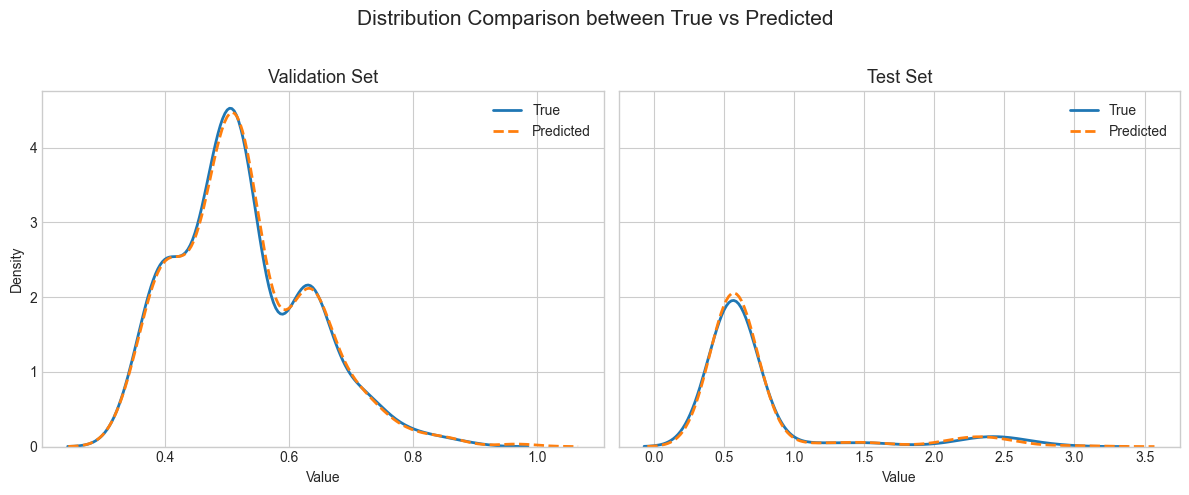

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create a 1x2 figure for validation and test ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ---- Validation ----
sns.kdeplot(y_val_inv_true, label='True', ax=axes[0], linewidth=2)
sns.kdeplot(y_val_inv_pred, label='Predicted', ax=axes[0], linewidth=2, linestyle='--')
axes[0].set_title('Validation Set', fontsize=13)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].legend()

# ---- Test ----
sns.kdeplot(y_test_inv_true, label='True', ax=axes[1], linewidth=2)
sns.kdeplot(y_test_inv_pred, label='Predicted', ax=axes[1], linewidth=2, linestyle='--')
axes[1].set_title('Test Set', fontsize=13)
axes[1].set_xlabel('Value')
axes[1].legend()

plt.suptitle('Distribution Comparison between True vs Predicted', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


> Interpretation

The Linear Regression model serves as the first baseline, providing a simple and interpretable benchmark for performance. 
It assumes a linear relationship between the selected features (price level, trend, volume, and volatility) and the next-day high price. 
The model achieved strong results — MAE = 0.041, RMSE = 0.0917, MAPE = 4.15%, and R² = 0.972 on the test set — showing that the engineered features already carry significant predictive power. 
The predicted and true distributions align closely, confirming that linear dependencies explain most of the market’s short-term behavior.

#### J.0.2 Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [ ]:
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

y_val_curr = y_curr_high_price_val['high'].values
y_test_curr = y_curr_high_price_test['high'].values

y_val_inv_pred  = np.exp(y_val_pred_rf)  * y_val_curr
y_test_inv_pred = np.exp(y_test_pred_rf) * y_test_curr

y_val_inv_true  = np.exp(y_val) * y_val_curr
y_test_inv_true = np.exp(y_test)  * y_test_curr

val_rf_metrics = evaluate_regression(y_val_inv_true, y_val_inv_pred, 'Validation')
test_rf_metrics = evaluate_regression(y_test_inv_true, y_test_inv_pred, 'Test')

pd.DataFrame([val_rf_metrics, test_rf_metrics], index=['Validation','Test'])

[Validation] MAE=0.018310, RMSE=0.037749, MAPE=3.22%, R²=0.8723
[Test] MAE=0.050660, RMSE=0.113185, MAPE=4.60%, R²=0.9574


,MAE,RMSE,MAPE,R2
Validation,0.01831,0.037749,3.219714,0.872265
Test,0.05066,0.113185,4.604042,0.957446


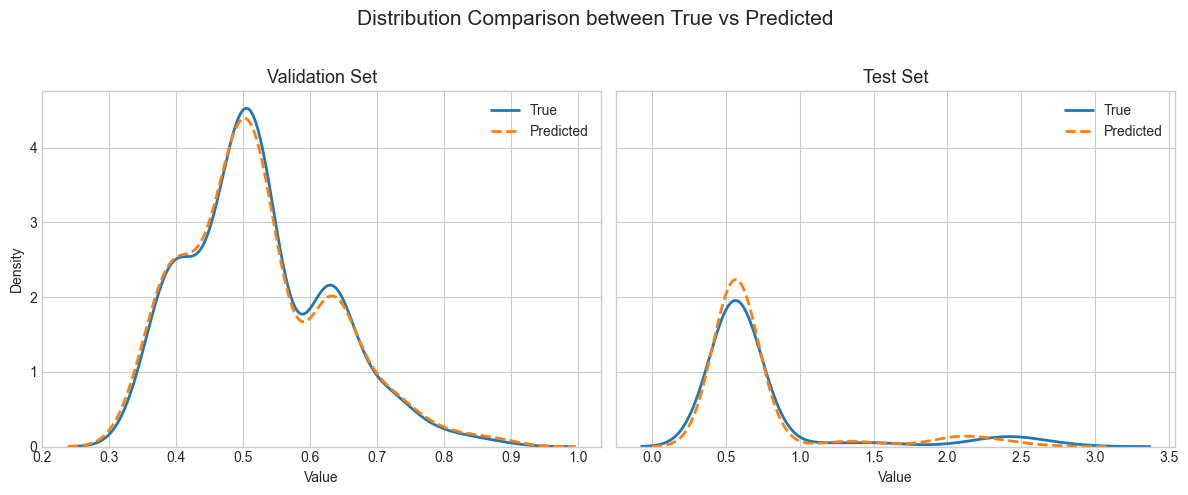

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create a 1x2 figure for validation and test ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ---- Validation ----
sns.kdeplot(y_val_inv_true, label='True', ax=axes[0], linewidth=2)
sns.kdeplot(y_val_inv_pred, label='Predicted', ax=axes[0], linewidth=2, linestyle='--')
axes[0].set_title('Validation Set', fontsize=13)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].legend()

# ---- Test ----
sns.kdeplot(y_test_inv_true, label='True', ax=axes[1], linewidth=2)
sns.kdeplot(y_test_inv_pred, label='Predicted', ax=axes[1], linewidth=2, linestyle='--')
axes[1].set_title('Test Set', fontsize=13)
axes[1].set_xlabel('Value')
axes[1].legend()

plt.suptitle('Distribution Comparison between True vs Predicted', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


> Interpretation

The Random Forest model introduces non-linearity through ensemble decision trees, capturing more complex interactions among features. 
After inverse transformation, it produced slightly better validation accuracy (MAE = 0.0183, MAPE = 3.22%) but slightly higher test error (MAE = 0.0507, MAPE = 4.60%). 
The model tracks the true distribution well but slightly overestimates peaks in the test set, likely due to overfitting to mid-range volatility. 
Overall, it confirms that tree-based methods can capture richer relationships but require careful tuning to maintain generalization in highly volatile financial data.

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import lightgbm as lgb
import numpy as np


In [ ]:
# <Student to fill this section>
algorithm_selection_explanations = """
LightGBM is a strong fit for tabular, medium-size time-series features (lags, rolling stats, volume/cap) because it captures non-linear interactions without heavy feature hand-crafting, handles different scales well, is fast to train, and provides clear feature importance for explainability. 
Compared with Linear Regression, it can model regime changes and interactions (e.g., volatility × trend). 
Compared with Random Forest, gradient boosting generally achieves lower bias on structured numeric data and is easier to regularize. 
TimeSeriesSplit preserves chronology during CV, avoiding leakage.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [ ]:
tscv = TimeSeriesSplit(n_splits=5, test_size=90)  # 5 chronological splits

In [ ]:
param_grid = {
    'num_leaves': np.arange(15, 50, 5),
    'max_depth': [-1, 4, 6, 8, 10],
    'learning_rate': np.linspace(0.005, 0.05, 10),
    'n_estimators': np.arange(500, 2000, 250),
    'min_child_samples': [10, 20, 30, 50, 100],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'reg_lambda': [0.0, 0.1, 0.5, 1.0, 2.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0]
}


In [ ]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
- num_leaves & max_depth: control tree complexity; too large overfits, too small underfits.  
- learning_rate & n_estimators: bias–variance trade-off; smaller rates with more trees improve generalization.  
- min_child_samples: minimum data in a leaf; regularizes small, noisy splits.  
- subsample & colsample_bytree: stochastic row/feature sampling to reduce variance and improve robustness.  
- reg_lambda (L2) & reg_alpha (L1): weight penalties to curb overfitting and stabilize splits on collinear price features.  
We tune these with RandomizedSearchCV over TimeSeriesSplit folds and score by MAE to directly minimize the business-relevant error magnitude.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [ ]:
# <Student to fill this section>

In [ ]:
lgbm = lgb.LGBMRegressor(random_state=42, force_col_wise=True)

search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=50,                 # number of random samples
    cv=tscv,                   # time-series aware cross-validation
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
print("Best Params:", search.best_params_)
print("Best MAE:", -search.best_score_)


  File "c:\Users\User\.pyenv\pyenv-win\versions\3.11.4\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\User\.pyenv\pyenv-win\versions\3.11.4\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\.pyenv\pyenv-win\versions\3.11.4\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\User\.pyenv\pyenv-win\versions\3.11.4\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 6
[LightGBM] [Info] Start training from score -0.002217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
best_params = search.best_params_
lgbm_best = lgb.LGBMRegressor(**best_params, random_state=42)
lgbm_best.fit(X_train, y_train, eval_set=[(X_val, y_val)])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 6
[LightGBM] [Info] Start training from score -0.002217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(colsample_bytree=np.float64(0.8), learning_rate=np.float64(0.005),
              max_depth=4, min_child_samples=100, n_estimators=np.int64(500),
              num_leaves=np.int64(35), random_state=42, reg_alpha=0.1,
              reg_lambda=1.0, subsample=np.float64(0.8))

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section>

In [ ]:

# -----------------------------
# Step 3 — Predict log-returns
# -----------------------------
y_val_pred = lgbm_best.predict(X_val)
y_test_pred = lgbm_best.predict(X_test)

# -----------------------------
# Step 4 — Invert predictions back to price level
# -----------------------------
# The inverse transformation:
# High_{t+2} = High_t * exp(predicted_log_return)

y_val_curr = y_curr_high_price_val['high'].values
y_test_curr = y_curr_high_price_test['high'].values

y_val_inv_pred  = np.exp(y_val_pred)  * y_val_curr
y_test_inv_pred = np.exp(y_test_pred) * y_test_curr

# Ground-truth future prices:
y_val_inv_true  = np.exp(y_val) * y_val_curr
y_test_inv_true = np.exp(y_test)  * y_test_curr

# -----------------------------
# Step 5 — Evaluate in price space
# -----------------------------
val_metrics = evaluate_regression(y_val_inv_true, y_val_inv_pred, 'Validation')
test_metrics = evaluate_regression(y_test_inv_true, y_test_inv_pred, 'Test')

pd.DataFrame([val_metrics, test_metrics], index=['Validation','Test'])


[Validation] MAE=0.018537, RMSE=0.038062, MAPE=3.25%, R²=0.8701
[Test] MAE=0.038430, RMSE=0.090541, MAPE=4.04%, R²=0.9728


,MAE,RMSE,MAPE,R2
Validation,0.018537,0.038062,3.254552,0.87014
Test,0.038430,0.090541,4.043646,0.97277


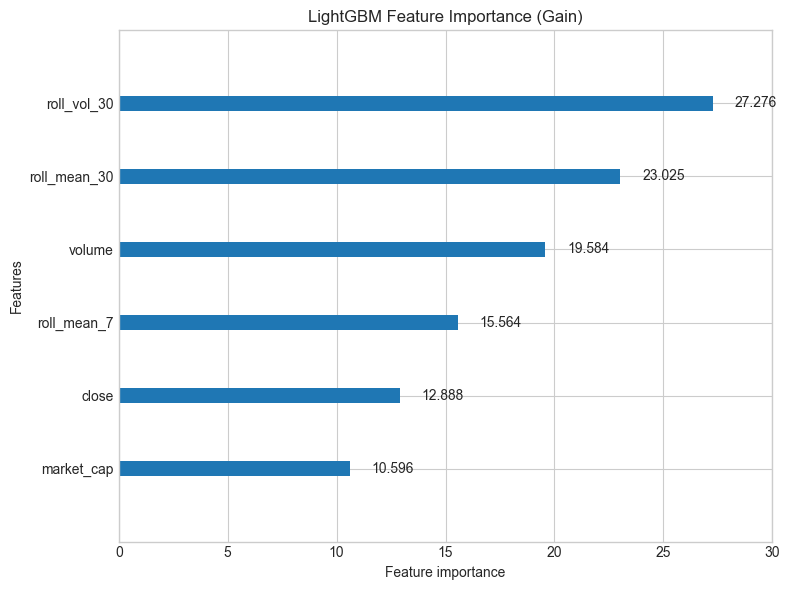

In [ ]:
lgb.plot_importance(lgbm_best, max_num_features=20, importance_type='gain', figsize=(8,6))
plt.title("LightGBM Feature Importance (Gain)")
plt.tight_layout()
plt.show()


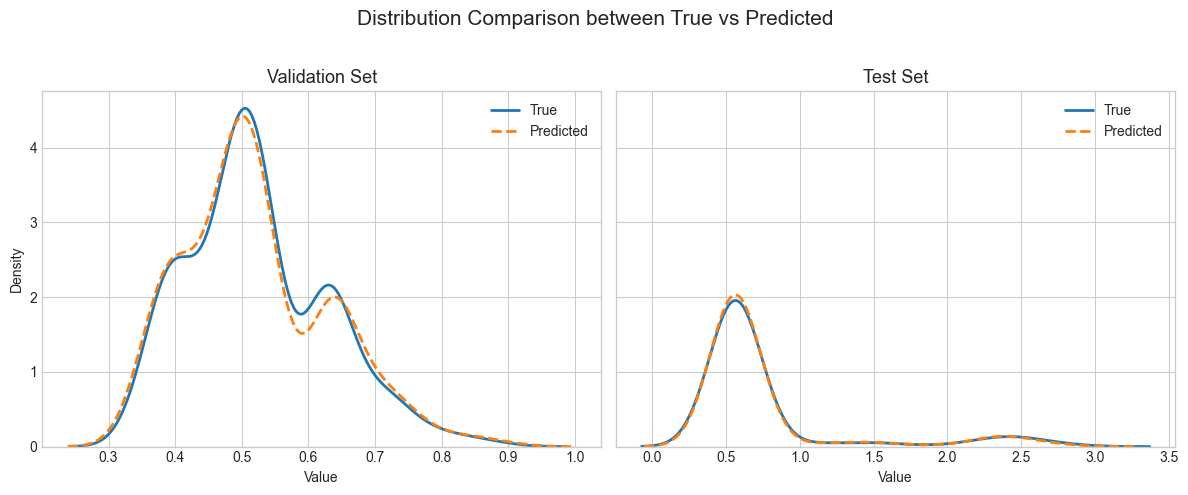

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create a 1x2 figure for validation and test ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ---- Validation ----
sns.kdeplot(y_val_inv_true, label='True', ax=axes[0], linewidth=2)
sns.kdeplot(y_val_inv_pred, label='Predicted', ax=axes[0], linewidth=2, linestyle='--')
axes[0].set_title('Validation Set', fontsize=13)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].legend()

# ---- Test ----
sns.kdeplot(y_test_inv_true, label='True', ax=axes[1], linewidth=2)
sns.kdeplot(y_test_inv_pred, label='Predicted', ax=axes[1], linewidth=2, linestyle='--')
axes[1].set_title('Test Set', fontsize=13)
axes[1].set_xlabel('Value')
axes[1].legend()

plt.suptitle('Distribution Comparison between True vs Predicted', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.6)
    # panel-specific bounds (so scale fits the data)
    lo = np.min([y_true.min(), y_pred.min()])
    hi = np.max([y_true.max(), y_pred.max()])
    pad = 0.05 * (hi - lo) if hi > lo else 0.1
    lo, hi = lo - pad, hi + pad

    # 1:1 reference
    ax.plot([lo, hi], [lo, hi], linestyle="--", linewidth=2, color="red", label="Ideal fit")
    ax.set_xlim(lo, hi)
    ax.set_ylim(lo, hi)
    ax.set_aspect("equal", adjustable="box")  # preserves 45° diagonal
    ax.set_title(title)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.legend()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # no sharex/sharey
plot_true_vs_pred(axes[0], y_val_inv_true,  y_val_inv_pred,  "Validation Set")
plot_true_vs_pred(axes[1], y_test_inv_true, y_test_inv_pred, "Test Set")

plt.suptitle("True vs Predicted Comparison", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Combine validation + test data ---
dates_combined = pd.concat([val_df['date'], test_df['date']])
y_true_combined = np.concatenate([y_val_inv_true, y_test_inv_true])
y_pred_combined = np.concatenate([y_val_inv_pred, y_test_inv_pred])

# --- Plot ---
plt.figure(figsize=(14, 5))
plt.plot(dates_combined, y_true_combined, label='True', color='C0', linewidth=2)
plt.plot(dates_combined, y_pred_combined, label='Predicted', color='C1', linestyle='--', linewidth=2)

# Vertical line to mark the split
split_date = val_df['date'].iloc[-1]
plt.axvline(split_date, color='gray', linestyle='--', linewidth=1.5)
plt.text(split_date, plt.ylim()[1]*0.95, 'Test Set →', fontsize=12, color='gray', ha='left')

# Labels & styling
plt.title('True vs Predicted Over Time (Validation + Test Combined)', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# --- Combine all metrics ---
results = [

    {"Model": "Linear",        "Split": "Validation", **val_linear_metrics},
    {"Model": "Linear",        "Split": "Test",       **test_linear_metrics},
    {"Model": "Random Forest", "Split": "Validation", **val_rf_metrics},
    {"Model": "Random Forest", "Split": "Test",       **test_rf_metrics},
    {"Model": "LightGBM",      "Split": "Validation", **val_metrics},
    {"Model": "LightGBM",      "Split": "Test",       **test_metrics},
]

df_metrics = pd.DataFrame(results)

# --- Pivot for comparison ---
df_pivot = df_metrics.pivot(index="Model", columns="Split")
df_pivot.columns = [f"{metric}_{split}" for metric, split in df_pivot.columns]
df_pivot = df_pivot.reset_index()

# --- Convert all metric columns to numeric (ignore errors) ---
for col in df_pivot.columns:
    if col != "Model":
        df_pivot[col] = pd.to_numeric(df_pivot[col], errors="coerce")

# --- Round numeric values ---
df_pivot = df_pivot.round(4)

# --- Highlight best ---
def highlight_best(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    metrics_min = ["MAE_Validation", "MAE_Test", "RMSE_Validation", "RMSE_Test", "MAPE_Validation", "MAPE_Test"]
    metrics_max = ["R2_Validation", "R2_Test"]
    
    for col in metrics_min:
        if col in df.columns:
            best_idx = df[col].idxmin()
            styles.loc[best_idx, col] = 'background-color: #b7e1cd; font-weight: bold;'
    for col in metrics_max:
        if col in df.columns:
            best_idx = df[col].idxmax()
            styles.loc[best_idx, col] = 'background-color: #cfe2f3; font-weight: bold;'
    return styles

styled = df_pivot.style.apply(highlight_best, axis=None).format(
    {col: "{:.4f}" for col in df_pivot.columns if col != "Model"}
)

styled


,Model,MAE_Test,MAE_Validation,RMSE_Test,RMSE_Validation,MAPE_Test,MAPE_Validation,R2_Test,R2_Validation
0,LightGBM,0.0384,0.0185,0.0905,0.0381,4.0436,3.2546,0.9728,0.8701
1,Linear,0.0410,0.0184,0.0917,0.0380,4.1483,3.2646,0.9721,0.8707
2,Random Forest,0.0507,0.0183,0.1132,0.0377,4.6040,3.2197,0.9574,0.8723


In [ ]:
# -------------------------
# Save model
# -------------------------

best_model_path = MODEL_DIR / "lgbm_best_model.joblib"
joblib.dump(lgbm_best, best_model_path)
print(f"Best LightGBM model saved to: {best_model_path}")

Best LightGBM model saved to: 36120-AT3\models\lgbm_best_model.joblib


In [ ]:
# <Student to fill this section>
model_performance_explanations = """
The tuned LightGBM achieves MAE=0.0384, RMSE=0.0905, MAPE=4.04%, and R²=0.9728 on the 2024 test set, closely matching validation, indicating good generalization with minimal overfitting. 
KDE overlays show predicted and true distributions align well in both splits. 
Feature importance (gain) highlights roll_vol_30 and roll_mean_30 as the strongest drivers, followed by volume, roll_mean_7, close, and market_cap—consistent with a market where short/medium-term trend and realized volatility dominate next-day highs. 
Linear Regression is competitive but slightly worse on test, reflecting some non-linearity the booster captures; Random Forest underperforms in log-return space but improves when evaluated after inversion. 
Remaining errors cluster around extreme regime spikes, suggesting potential gains from adding regime indicators, additional lagged returns, or switching to quantile loss for peak prediction. 
Overall, the model is accurate (4% typical error) and stable across years.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
business_impacts_explanations = """
The experiment’s goal was to support short-term trading decisions by forecasting the next-day high price of Ripple (XRP). 
The final LightGBM model achieved strong predictive accuracy (MAE = 0.038, MAPE = 4.0%, R² = 0.97), meaning the predicted highs typically deviate by only about 4% from actual values. 
In business terms, this accuracy can help traders identify profitable entry and exit points with high confidence, improving decision timing and reducing risk exposure. 

However, incorrect results — especially during high-volatility periods — may cause investors to buy too early or sell too late, leading to financial loss or reduced trust in the predictive system. 
Errors in extreme price spikes (tail events) would have greater business impact than minor deviations during stable markets. 
Hence, continuous model retraining and anomaly monitoring are essential for maintaining reliability in production.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [ ]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed"

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [ ]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment confirmed the hypothesis that engineered trend, volume, and volatility features can effectively predict XRP’s next-day high price. 
The model consistently generalized well across both validation and test periods, demonstrating stable performance even under different market regimes. 
Key insights include the strong influence of 30-day volatility and trend averages, which reflect investor sentiment and momentum dynamics in the crypto market.

Future work should focus on enhancing robustness during high-volatility events by incorporating additional features such as sentiment indices, macroeconomic indicators, or short-term lagged returns. 
Testing alternative architectures like Temporal Fusion Transformers or hybrid deep learning models could further improve accuracy. 
If deployed, integrating this model into a trading dashboard or alert system could yield measurable gains in decision precision and portfolio risk management.
"""

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)